# Imports

In [1]:
import seaborn as sns
import math as math
from random import gauss as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import itertools
from pmdarima import auto_arima
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from keras.preprocessing.sequence import TimeseriesGenerator
from pathlib import Path
import os
from fbprophet import Prophet

# Functions

In [2]:
def CleanNegatives(df,Tag,CleanName):
    InBlock = False  # Tags that I am inside of a -999 block
    Start = 0
    End   = 0
    Clean = df[Tag]
    for Index in range(len(Clean)):
        if InBlock:
            if Clean[Index] > 0: # Exit condition 
                End = Index
                InBlock = False
                if Start ==0:
                    AVG = Clean[End]
                elif End == len(Clean) - 1:
                    AVG = Clean[Start]
                else:
                    AVG = (Clean[Start-1]+Clean[End])/2
                # Cleaning negatives, replacing by average at the endpoints of the block
                for NewIndex in range(Start,End):
                    Clean[NewIndex] = AVG
        else:  # Not In the block
            if Clean[Index] < 0: # Enter condition
                Start = Index
                InBlock = True
    df[CleanName] = Clean
                

In [3]:
def Cleanup(df,Tag1,Tag2,ResultTag):
    Clean = []
    for i in range(len(df)):
        Value = ( df[Tag1][i] if not math.isnan(df[Tag1][i]) else df[Tag2][i])
        Clean.append(Value)
    df[ResultTag] = Clean

# Cleaning Data

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
datapath = Path.cwd() / "data"
print(datapath)

/Users/dc/Desktop/Flatiron/projects/Capstone-Disney-World-Date-and-Attendance-Predictor/data


In [6]:
datasets = os.listdir(datapath)
datasets = list(sorted(datasets))
print(datasets)

['7_dwarfs_train.csv', 'dinosaur.csv', 'entities.csv', 'expedition_everest.csv', 'kilimanjaro_safaris.csv', 'metadata.csv', 'navi_river.csv', 'pirates_of_caribbean.csv', 'rock_n_rollercoaster.csv', 'slinky_dog.csv', 'soarin.csv', 'spaceship_earth.csv', 'splash_mountain.csv', 'touringplans_data_dictionary.xlsx', 'toy_story_mania.csv']


In [7]:
for i in datasets:
    try:
        exec(f"{i.split('.csv')[0]} = pd.read_csv(datapath / i)")
    except:
        print(f"{i} cannot be imported automatically")

7_dwarfs_train.csv cannot be imported automatically
touringplans_data_dictionary.xlsx cannot be imported automatically


In [8]:
seven_dwarfs_train = pd.read_csv(datapath / "7_dwarfs_train.csv")
datasets[0] = "seven_dwarfs_train.csv"

In [9]:
for i in datasets:
    try:
        print(i)
        display(eval(f"{i.split('.csv')[0]}.head()"), eval(f"len({i.split('.csv')[0]})"))
    except:
        pass

seven_dwarfs_train.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:51:12      NaN      45.0
1  01/01/2015  2015-01-01 08:02:13      NaN      60.0
2  01/01/2015  2015-01-01 08:05:30     54.0       NaN
3  01/01/2015  2015-01-01 08:09:12      NaN      60.0
4  01/01/2015  2015-01-01 08:16:12      NaN      60.0

321631

dinosaur.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0

252403

entities.csv


code                                               name  \
0  AK01                            It's Tough to Be a Bug!   
1  AK07                                Kilimanjaro Safaris   
2  AK11  Expedition Everest - Legend of the Forbidden M...   
3  AK14                                  Kali River Rapids   
4  AK18                                           DINOSAUR   

               short_name              land   opened_on  duration  \
0  It's Tough to Be a Bug  Discovery Island  04/22/1998       8.0   
1     Kilimanjaro Safaris            Africa  04/22/1998      20.0   
2      Expedition Everest              Asia  04/07/2006       4.0   
3       Kali River Rapids              Asia  02/15/1999      10.0   
4                DINOSAUR   DinoLand U.S.A.  04/22/1998       3.5   

   average_wait_per_hundred  
0                      12.0  
1                       4.0  
2                       4.0  
3                       5.0  
4                       3.0

95

expedition_everest.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0
3  01/01/2015  2015-01-01 08:12:23      NaN       5.0
4  01/01/2015  2015-01-01 08:19:26      NaN       5.0

275274

kilimanjaro_safaris.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0

257785

metadata.csv


DATE WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
0  01/01/2015               NaN          5          0           0   
1  01/02/2015               NaN          6          1           0   
2  01/03/2015               NaN          7          2           0   
3  01/04/2015               NaN          1          3           1   
4  01/05/2015               NaN          2          4           1   

   MONTHOFYEAR  YEAR          SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY  \
0            1  2015  CHRISTMAS PEAK          0         5      nyd        1   
1            1  2015       CHRISTMAS          2         5      NaN        0   
2            1  2015       CHRISTMAS          3         0      NaN        0   
3            1  2015       CHRISTMAS          4         0      NaN        0   
4            1  2015       CHRISTMAS          5         0      NaN        0   

  WDWTICKETSEASON WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  \
0             NaN      NaN       NaN         0        0  CHRISTMAS PEAK   
1             NaN      NaN       NaN         0        0       CHRISTMAS   
2             NaN      NaN       NaN         0        0       CHRISTMAS   
3             NaN      NaN       NaN         0        0       CHRISTMAS   
4             NaN      NaN       NaN         0        0       CHRISTMAS   

   WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent  \
0       73.02       59.81        66.41      NaN        0      NaN        0   
1       78.00       60.72        69.36      NaN        0      NaN        0   
2       83.12       67.31        75.22      NaN        0      NaN        0   
3       83.93       67.97        75.95      NaN        0      NaN        0   
4       72.30       56.89        64.60      NaN        0      NaN        0   

  HSeventN  HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      NaN        0      NaN        0      NaN        0%                   0%   
1      NaN        0      NaN        0      NaN        0%                   0%   
2      NaN        0      NaN        0      NaN        0%                   0%   
3      NaN        0      NaN        0      NaN       67%                  74%   
4      NaN        0      NaN        0      NaN       67%                  74%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3           77%           74%                74%                70%   
4           77%           74%                74%                70%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                  66%          94%                  68%                 57%   
4                  66%          94%                  68%                 57%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                 56%                70%               79%   
4                 56%                70%               79%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA  \
0                   0%                0%              0%                 0%   
1                   0%                0%              0%                 0%   
2                   0%                0%              0%                 0%   
3                  43%               93%            100%               100%   
4                  43%              

2079

navi_river.csv


date             datetime  SACTMIN  SPOSTMIN
0  05/26/2017  2017-05-26 09:09:46      NaN    -999.0
1  05/26/2017  2017-05-26 09:10:12      NaN       5.0
2  05/26/2017  2017-05-26 09:17:09      NaN      45.0
3  05/26/2017  2017-05-26 09:24:07      NaN      45.0
4  05/26/2017  2017-05-26 09:30:10      NaN      45.0

182121

pirates_of_caribbean.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 08:27:58      NaN    -999.0
1  01/01/2015  2015-01-01 08:56:55      NaN    -999.0
2  01/01/2015  2015-01-01 08:57:38      NaN    -999.0
3  01/01/2015  2015-01-01 08:58:34      NaN    -999.0
4  01/01/2015  2015-01-01 09:24:55      NaN    -999.0

301946

rock_n_rollercoaster.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:46:22      NaN       5.0
1  01/01/2015  2015-01-01 07:53:19      NaN       5.0
2  01/01/2015  2015-01-01 08:04:29      NaN      20.0
3  01/01/2015  2015-01-01 08:11:19      NaN      20.0
4  01/01/2015  2015-01-01 08:16:29      NaN      20.0

277509

slinky_dog.csv


date             datetime  SACTMIN  SPOSTMIN
0  06/30/2018  2018-06-30 07:44:06      NaN     270.0
1  06/30/2018  2018-06-30 07:51:06      NaN     270.0
2  06/30/2018  2018-06-30 07:58:07      NaN     270.0
3  06/30/2018  2018-06-30 08:02:08      NaN     270.0
4  06/30/2018  2018-06-30 08:09:06      NaN     270.0

135946

soarin.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:45:15      NaN      10.0
1  01/01/2015  2015-01-01 07:52:16      NaN      10.0
2  01/01/2015  2015-01-01 08:03:17      NaN      10.0
3  01/01/2015  2015-01-01 08:10:16      NaN      35.0
4  01/01/2015  2015-01-01 08:17:19      NaN      45.0

274770

spaceship_earth.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:45:15      NaN       5.0
1  01/01/2015  2015-01-01 07:52:16      NaN       5.0
2  01/01/2015  2015-01-01 08:38:17      NaN       5.0
3  01/01/2015  2015-01-01 08:45:15      NaN       5.0
4  01/01/2015  2015-01-01 08:52:15      NaN       5.0

277248

splash_mountain.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:51:12      NaN       5.0
1  01/01/2015  2015-01-01 08:02:13      NaN       5.0
2  01/01/2015  2015-01-01 08:09:12      NaN       5.0
3  01/01/2015  2015-01-01 08:16:12      NaN       5.0
4  01/01/2015  2015-01-01 08:23:12      NaN       5.0

287948

touringplans_data_dictionary.xlsx
toy_story_mania.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:51:16      NaN      20.0
1  01/01/2015  2015-01-01 07:53:19      NaN      20.0
2  01/01/2015  2015-01-01 08:04:29      NaN      30.0
3  01/01/2015  2015-01-01 08:11:19      NaN      30.0
4  01/01/2015  2015-01-01 08:12:31      NaN      40.0

284170

In [10]:
# print(sorted(dinosaur["SACTMIN"].unique()))

In [11]:
# print(sorted(dinosaur["SPOSTMIN"].unique()))

In [12]:
# print(dinosaur.dtypes)

In [13]:
print(datasets)
data_sets = [i.split(".csv")[0] for i in datasets if ".csv" in i and "entities" not in i and "metadata" not in i]
print(data_sets)

['seven_dwarfs_train.csv', 'dinosaur.csv', 'entities.csv', 'expedition_everest.csv', 'kilimanjaro_safaris.csv', 'metadata.csv', 'navi_river.csv', 'pirates_of_caribbean.csv', 'rock_n_rollercoaster.csv', 'slinky_dog.csv', 'soarin.csv', 'spaceship_earth.csv', 'splash_mountain.csv', 'touringplans_data_dictionary.xlsx', 'toy_story_mania.csv']
['seven_dwarfs_train', 'dinosaur', 'expedition_everest', 'kilimanjaro_safaris', 'navi_river', 'pirates_of_caribbean', 'rock_n_rollercoaster', 'slinky_dog', 'soarin', 'spaceship_earth', 'splash_mountain', 'toy_story_mania']


### Merging with metadata

In [14]:
for i in data_sets: 
    print(i)
    exec(f'{i}_data = {i}.merge(metadata, how= "left", left_on= "date", right_on= "DATE")')
    print(eval(f"len({i}_data)"))

seven_dwarfs_train
321631
dinosaur
252403
expedition_everest
275274
kilimanjaro_safaris
257785
navi_river
182121
pirates_of_caribbean
301946
rock_n_rollercoaster
277509
slinky_dog
135946
soarin
274770
spaceship_earth
277248
splash_mountain
287948
toy_story_mania
284170


In [15]:
# dinosaur_data = dinosaur.merge(metadata, how= "left", left_on= "date", right_on= "DATE")
# display(dinosaur_data.head())
# print(len(dinosaur_data))

### Cleaning -999 Values

In [16]:
for i in data_sets: 
    print(i)
    exec(f"CleanNegatives({i}_data,'SPOSTMIN','SPOSTMINClean')")
    display(eval(f"{i}_data.head()"))

seven_dwarfs_train


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:12      NaN      45.0  01/01/2015   
1  01/01/2015  2015-01-01 08:02:13      NaN      60.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:30     54.0       NaN  01/01/2015   
3  01/01/2015  2015-01-01 08:09:12      NaN      60.0  01/01/2015   
4  01/01/2015  2015-01-01 08:16:12      NaN      60.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

dinosaur


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

expedition_everest


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

kilimanjaro_safaris


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

navi_river


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  05/26/2017  2017-05-26 09:09:46      NaN       5.0  05/26/2017   
1  05/26/2017  2017-05-26 09:10:12      NaN       5.0  05/26/2017   
2  05/26/2017  2017-05-26 09:17:09      NaN      45.0  05/26/2017   
3  05/26/2017  2017-05-26 09:24:07      NaN      45.0  05/26/2017   
4  05/26/2017  2017-05-26 09:30:10      NaN      45.0  05/26/2017   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0              peak        6.0      145.0        21.0          5.0  2017.0   
1              peak        6.0      145.0        21.0          5.0  2017.0   
2              peak        6.0      145.0        21.0          5.0  2017.0   
3              peak        6.0      145.0        21.0          5.0  2017.0   
4              peak        6.0      145.0        21.0          5.0  2017.0   

   SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON WDWRaceN  \
0  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
1  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
2  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
3  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
4  SPRING        4.0       3.0      NaN      0.0            peak      NaN   

  WDWeventN  WDWevent  WDWrace WDWSEASON  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  \
0       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
1       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
2       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
3       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
4       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   

  MKeventN  MKevent EPeventN  EPevent HSeventN  HSevent AKeventN  AKevent  \
0      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
1      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
2      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
3      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
4      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   

  HOLIDAYJ inSession inSession_Enrollment inSession_wdw inSession_dlr  \
0      NaN       72%                  74%           83%           80%   
1      NaN       72%                  74%           83%           80%   
2      NaN       72%                  74%           83%           80%   
3      NaN       72%                  74%           83%           80%   
4      NaN       72%                  74%           83%           80%   

  inSession_sqrt_WDW inSession_sqrt_DLR inSession_California inSession_DC  \
0                77%                74%                  75%          77%   
1                77%                74%                  75%          77%   
2                77%                74%                  75%          77%   
3                77%                74%                  75%          77%   
4                77%                74%                  75%          77%   

  inSession_Central_FL inSession_Drive1_FL inSession_Drive2_FL  \
0                  80%                 69%                 69%   
1                  80%                 69%                 69%   
2                  80%                 69%                 69%   
3                  80%                 69%                 69%   
4                  80%                 69%                 69%   

  inSession_Drive_CA inSession_Florida inSession_Mardi_Gras inSession_Midwest  \
0                73%               86%                  71%               52%   
1                73%               86%                  71%               52%   
2                73%               86%                  71%               52%   
3                73%               86%                  71%               52%   
4       

pirates_of_caribbean


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 08:27:58      NaN      10.0  01/01/2015   
1  01/01/2015  2015-01-01 08:56:55      NaN      10.0  01/01/2015   
2  01/01/2015  2015-01-01 08:57:38      NaN      10.0  01/01/2015   
3  01/01/2015  2015-01-01 08:58:34      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 09:24:55      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

rock_n_rollercoaster


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:46:22      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:53:19      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:04:29      NaN      20.0  01/01/2015   
3  01/01/2015  2015-01-01 08:11:19      NaN      20.0  01/01/2015   
4  01/01/2015  2015-01-01 08:16:29      NaN      20.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

slinky_dog


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  06/30/2018  2018-06-30 07:44:06      NaN     270.0  06/30/2018   
1  06/30/2018  2018-06-30 07:51:06      NaN     270.0  06/30/2018   
2  06/30/2018  2018-06-30 07:58:07      NaN     270.0  06/30/2018   
3  06/30/2018  2018-06-30 08:02:08      NaN     270.0  06/30/2018   
4  06/30/2018  2018-06-30 08:09:06      NaN     270.0  06/30/2018   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0              peak        7.0      180.0        25.0          6.0  2018.0   
1              peak        7.0      180.0        25.0          6.0  2018.0   
2              peak        7.0      180.0        25.0          6.0  2018.0   
3              peak        7.0      180.0        25.0          6.0  2018.0   
4              peak        7.0      180.0        25.0          6.0  2018.0   

   SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON WDWRaceN  \
0  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
1  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
2  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
3  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
4  SPRING        5.0       0.0      NaN      0.0            peak      NaN   

  WDWeventN  WDWevent  WDWrace WDWSEASON  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  \
0       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
1       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
2       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
3       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
4       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   

  MKeventN  MKevent EPeventN  EPevent HSeventN  HSevent AKeventN  AKevent  \
0      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
1      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
2      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
3      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
4      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   

  HOLIDAYJ inSession inSession_Enrollment inSession_wdw inSession_dlr  \
0      NaN        8%                   2%            1%            2%   
1      NaN        8%                   2%            1%            2%   
2      NaN        8%                   2%            1%            2%   
3      NaN        8%                   2%            1%            2%   
4      NaN        8%                   2%            1%            2%   

  inSession_sqrt_WDW inSession_sqrt_DLR inSession_California inSession_DC  \
0                 1%                 2%                   6%           0%   
1                 1%                 2%                   6%           0%   
2                 1%                 2%                   6%           0%   
3                 1%                 2%                   6%           0%   
4                 1%                 2%                   6%           0%   

  inSession_Central_FL inSession_Drive1_FL inSession_Drive2_FL  \
0                   0%                  0%                  1%   
1                   0%                  0%                  1%   
2                   0%                  0%                  1%   
3                   0%                  0%                  1%   
4                   0%                  0%                  1%   

  inSession_Drive_CA inSession_Florida inSession_Mardi_Gras inSession_Midwest  \
0                 4%                0%                   0%                0%   
1                 4%                0%                   0%                0%   
2                 4%                0%                   0%                0%   
3                 4%                0%                   0%                0%   
4       

soarin


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:45:15      NaN      10.0  01/01/2015   
1  01/01/2015  2015-01-01 07:52:16      NaN      10.0  01/01/2015   
2  01/01/2015  2015-01-01 08:03:17      NaN      10.0  01/01/2015   
3  01/01/2015  2015-01-01 08:10:16      NaN      35.0  01/01/2015   
4  01/01/2015  2015-01-01 08:17:19      NaN      45.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

spaceship_earth


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:45:15      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:52:16      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:38:17      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:45:15      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:52:15      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

splash_mountain


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:12      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 08:02:13      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:09:12      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:16:12      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:23:12      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

toy_story_mania


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:16      NaN      20.0  01/01/2015   
1  01/01/2015  2015-01-01 07:53:19      NaN      20.0  01/01/2015   
2  01/01/2015  2015-01-01 08:04:29      NaN      30.0  01/01/2015   
3  01/01/2015  2015-01-01 08:11:19      NaN      30.0  01/01/2015   
4  01/01/2015  2015-01-01 08:12:31      NaN      40.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

### Merging Wait Time Columns

In [17]:
for i in data_sets: 
    print(i)
    exec(f"Cleanup({i}_data,'SACTMIN','SPOSTMINClean','CleanTime')")
    display(eval(f"{i}_data.head()"))

seven_dwarfs_train


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:12      NaN      45.0  01/01/2015   
1  01/01/2015  2015-01-01 08:02:13      NaN      60.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:30     54.0       NaN  01/01/2015   
3  01/01/2015  2015-01-01 08:09:12      NaN      60.0  01/01/2015   
4  01/01/2015  2015-01-01 08:16:12      NaN      60.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

dinosaur


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

expedition_everest


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

kilimanjaro_safaris


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

navi_river


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  05/26/2017  2017-05-26 09:09:46      NaN       5.0  05/26/2017   
1  05/26/2017  2017-05-26 09:10:12      NaN       5.0  05/26/2017   
2  05/26/2017  2017-05-26 09:17:09      NaN      45.0  05/26/2017   
3  05/26/2017  2017-05-26 09:24:07      NaN      45.0  05/26/2017   
4  05/26/2017  2017-05-26 09:30:10      NaN      45.0  05/26/2017   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0              peak        6.0      145.0        21.0          5.0  2017.0   
1              peak        6.0      145.0        21.0          5.0  2017.0   
2              peak        6.0      145.0        21.0          5.0  2017.0   
3              peak        6.0      145.0        21.0          5.0  2017.0   
4              peak        6.0      145.0        21.0          5.0  2017.0   

   SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON WDWRaceN  \
0  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
1  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
2  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
3  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
4  SPRING        4.0       3.0      NaN      0.0            peak      NaN   

  WDWeventN  WDWevent  WDWrace WDWSEASON  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  \
0       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
1       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
2       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
3       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
4       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   

  MKeventN  MKevent EPeventN  EPevent HSeventN  HSevent AKeventN  AKevent  \
0      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
1      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
2      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
3      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
4      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   

  HOLIDAYJ inSession inSession_Enrollment inSession_wdw inSession_dlr  \
0      NaN       72%                  74%           83%           80%   
1      NaN       72%                  74%           83%           80%   
2      NaN       72%                  74%           83%           80%   
3      NaN       72%                  74%           83%           80%   
4      NaN       72%                  74%           83%           80%   

  inSession_sqrt_WDW inSession_sqrt_DLR inSession_California inSession_DC  \
0                77%                74%                  75%          77%   
1                77%                74%                  75%          77%   
2                77%                74%                  75%          77%   
3                77%                74%                  75%          77%   
4                77%                74%                  75%          77%   

  inSession_Central_FL inSession_Drive1_FL inSession_Drive2_FL  \
0                  80%                 69%                 69%   
1                  80%                 69%                 69%   
2                  80%                 69%                 69%   
3                  80%                 69%                 69%   
4                  80%                 69%                 69%   

  inSession_Drive_CA inSession_Florida inSession_Mardi_Gras inSession_Midwest  \
0                73%               86%                  71%               52%   
1                73%               86%                  71%               52%   
2                73%               86%                  71%               52%   
3                73%               86%                  71%               52%   
4       

pirates_of_caribbean


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 08:27:58      NaN      10.0  01/01/2015   
1  01/01/2015  2015-01-01 08:56:55      NaN      10.0  01/01/2015   
2  01/01/2015  2015-01-01 08:57:38      NaN      10.0  01/01/2015   
3  01/01/2015  2015-01-01 08:58:34      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 09:24:55      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

rock_n_rollercoaster


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:46:22      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:53:19      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:04:29      NaN      20.0  01/01/2015   
3  01/01/2015  2015-01-01 08:11:19      NaN      20.0  01/01/2015   
4  01/01/2015  2015-01-01 08:16:29      NaN      20.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

slinky_dog


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  06/30/2018  2018-06-30 07:44:06      NaN     270.0  06/30/2018   
1  06/30/2018  2018-06-30 07:51:06      NaN     270.0  06/30/2018   
2  06/30/2018  2018-06-30 07:58:07      NaN     270.0  06/30/2018   
3  06/30/2018  2018-06-30 08:02:08      NaN     270.0  06/30/2018   
4  06/30/2018  2018-06-30 08:09:06      NaN     270.0  06/30/2018   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0              peak        7.0      180.0        25.0          6.0  2018.0   
1              peak        7.0      180.0        25.0          6.0  2018.0   
2              peak        7.0      180.0        25.0          6.0  2018.0   
3              peak        7.0      180.0        25.0          6.0  2018.0   
4              peak        7.0      180.0        25.0          6.0  2018.0   

   SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON WDWRaceN  \
0  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
1  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
2  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
3  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
4  SPRING        5.0       0.0      NaN      0.0            peak      NaN   

  WDWeventN  WDWevent  WDWrace WDWSEASON  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  \
0       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
1       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
2       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
3       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
4       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   

  MKeventN  MKevent EPeventN  EPevent HSeventN  HSevent AKeventN  AKevent  \
0      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
1      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
2      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
3      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
4      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   

  HOLIDAYJ inSession inSession_Enrollment inSession_wdw inSession_dlr  \
0      NaN        8%                   2%            1%            2%   
1      NaN        8%                   2%            1%            2%   
2      NaN        8%                   2%            1%            2%   
3      NaN        8%                   2%            1%            2%   
4      NaN        8%                   2%            1%            2%   

  inSession_sqrt_WDW inSession_sqrt_DLR inSession_California inSession_DC  \
0                 1%                 2%                   6%           0%   
1                 1%                 2%                   6%           0%   
2                 1%                 2%                   6%           0%   
3                 1%                 2%                   6%           0%   
4                 1%                 2%                   6%           0%   

  inSession_Central_FL inSession_Drive1_FL inSession_Drive2_FL  \
0                   0%                  0%                  1%   
1                   0%                  0%                  1%   
2                   0%                  0%                  1%   
3                   0%                  0%                  1%   
4                   0%                  0%                  1%   

  inSession_Drive_CA inSession_Florida inSession_Mardi_Gras inSession_Midwest  \
0                 4%                0%                   0%                0%   
1                 4%                0%                   0%                0%   
2                 4%                0%                   0%                0%   
3                 4%                0%                   0%                0%   
4       

soarin


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:45:15      NaN      10.0  01/01/2015   
1  01/01/2015  2015-01-01 07:52:16      NaN      10.0  01/01/2015   
2  01/01/2015  2015-01-01 08:03:17      NaN      10.0  01/01/2015   
3  01/01/2015  2015-01-01 08:10:16      NaN      35.0  01/01/2015   
4  01/01/2015  2015-01-01 08:17:19      NaN      45.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

spaceship_earth


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:45:15      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:52:16      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:38:17      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:45:15      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:52:15      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

splash_mountain


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:12      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 08:02:13      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:09:12      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:16:12      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:23:12      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

toy_story_mania


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:16      NaN      20.0  01/01/2015   
1  01/01/2015  2015-01-01 07:53:19      NaN      20.0  01/01/2015   
2  01/01/2015  2015-01-01 08:04:29      NaN      30.0  01/01/2015   
3  01/01/2015  2015-01-01 08:11:19      NaN      30.0  01/01/2015   
4  01/01/2015  2015-01-01 08:12:31      NaN      40.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

### Dropping negative values

In [18]:
for i in data_sets: 
    print(i)
    exec(f'{i}_data[{i}_data.CleanTime < 0]')
    exec(f'{i}_data = {i}_data[{i}_data["CleanTime"] >= 0]')
    

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


### Dropping NaNs

In [19]:
for i in data_sets: 
    print(i)
    exec(f"{i}_data['CleanTime'] = {i}_data['CleanTime'].dropna()")

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


In [20]:
# seven_dwarfs_train_data = seven_dwarfs_train_data[seven_dwarfs_train_data['CleanTime'] >= 0]

In [21]:
# seven_dwarfs_train_data[seven_dwarfs_train_data.CleanTime < 0]

In [22]:
# CleanNegatives(dinosaur_data,'SPOSTMIN','SPOSTMINClean')
# display(dinosaur_data.head())

In [23]:
# Cleanup(dinosaur_data,'SACTMIN','SPOSTMINClean','CleanTime')
# display(dinosaur_data.head())

In [24]:
# dinosaur_data.head()

In [25]:
# dinosaur_data.fillna(-1, inplace=True)
# display(dinosaur_data.head())

In [26]:
# dinosaur_data.drop(columns = ["SACTMIN", "SPOSTMIN", "DATE", "SPOSTMINClean"], inplace=True)

In [27]:
# dtypes = dinosaur_data.dtypes
# print(dtypes)

In [28]:
# print(str(dinosaur_data.dtypes["date"]))
# cols = []
# for i, j in enumerate(dtypes):
#     if str(j) != "float64":
#         cols.append(dinosaur_data.dtypes.index[i])
# print(cols)

In [29]:
# def encode_labels(col):
#     le = LabelEncoder()
#     le.fit(col)
#     col = le.transform(col)
#     return col, le

In [30]:
# for i in range(2, len(cols)):
#     dinosaur_data[cols[i]] = dinosaur_data[cols[i]].astype(str)
#     dinosaur_data[cols[i]], _ = encode_labels(dinosaur_data[cols[i]])

In [31]:
# display(dinosaur_data.head())

In [32]:
# X = dinosaur_data.drop(columns = ["date", "datetime"])
# y = dinosaur_data["CleanTime"]

# Facebook Prophet Analysis

### Converting to datetime

In [33]:
for i in data_sets:
    exec(f"{i}_data['datetime'] = pd.to_datetime({i}_data.datetime)")
    exec(f"{i}_data.set_index('datetime', inplace=True)")


In [34]:
# dinosaur_data['datetime'] = pd.to_datetime(dinosaur_data.datetime)
# dinosaur_data.set_index('datetime', inplace=True)


### Resampling Data to Daily

In [35]:
for i in data_sets:
    print(i)
    exec(f"{i}_data = {i}_data.resample('D').mean()")
    exec(f"{i}_data = {i}_data.loc['2015-01-01 07:51:12':'2019-12-31 23:55:02']")
    exec(f"display({i}_data.head())")

seven_dwarfs_train


SACTMIN    SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                            
2015-01-02   112.50  113.000000   5.940789   0.940789    0.000000   
2015-01-03    41.75  102.304688   6.962121   1.962121    0.000000   
2015-01-04    15.00   80.720000   1.566929   2.905512    0.905512   
2015-01-05      NaN   87.370690   1.991379   3.991379    1.000000   
2015-01-06    22.00   79.615385   3.000000   5.000000    1.000000   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM   HOLIDAY  WDWevent  \
datetime                                                                   
2015-01-02          1.0  2015.0   1.881579  5.000000  0.059211       0.0   
2015-01-03          1.0  2015.0   2.962121  0.189394  0.000000       0.0   
2015-01-04          1.0  2015.0   3.905512  0.000000  0.000000       0.0   
2015-01-05          1.0  2015.0   4.991379  0.000000  0.000000       0.0   
2015-01-06          1.0  2015.0   6.000000  0.000000  0.000000       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0   77.705132   60.666118    69.185329      0.0      0.0   
2015-01-03      0.0   82.926061   67.060379    74.998030      0.0      0.0   
2015-01-04      0.0   83.853465   67.907638    75.881024      0.0      0.0   
2015-01-05      0.0   72.400259   56.985517    64.697845      0.0      0.0   
2015-01-06      0.0   77.670000   54.880000    66.280000      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0   0.059211    1.000000        0.0       0.0   
2015-01-03      0.0      0.0   0.000000    0.037879        0.0       0.0   
2015-01-04      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-05      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-06      0.0      0.0   0.000000    0.000000        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02   17.059211       18.059211      16.059211         0.0        0.0   
2015-01-03   16.037879       17.037879      15.037879         0.0        0.0   
2015-01-04   15.094488       16.094488      14.094488         0.0        0.0   
2015-01-05   14.008621       15.008621      12.017241         0.0        0.0   
2015-01-06   12.000000       14.000000      12.000000         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0   0.000000  0.940789    0.000000   0.059211   
2015-01-03        0.0         0.0   0.000000  0.037879    0.962121   0.000000   
2015-01-04        0.0         0.0   0.000000  0.000000    0.094488   0.000000   
2015-01-05        0.0         0.0   0.991379  0.000000    0.000000   0.000000   
2015-01-06        1.0         0.0   0.000000  0.000000    0.000000   0.000000   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02   14.881579       13.236842      12.177632   0.000000    0.000000   
2015-01-03   12.113636       14.924242      12.000000   0.962121    0.000000   
2015-01-04   12.000000       12.283465      12.000000   0.094488    0.905512   
2015-01-05   12.000000       12.000000      12.991379   0.000000    0.008621   
2015-01-06   13.000000       12.000000      12.000000   0.000000    0.000000   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02   0.940789  0.000000    0.059211   0.000000   14.000000   
2015-01-03   0.

dinosaur


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR  \
datetime                                                                        
2015-01-02    13.75  26.631579        6.0        1.0         0.0          1.0   
2015-01-03      NaN  26.265060        7.0        2.0         0.0          1.0   
2015-01-04      NaN  18.724490        1.0        3.0         1.0          1.0   
2015-01-05    18.00  24.322034        2.0        4.0         1.0          1.0   
2015-01-06    14.50  18.538462        3.0        5.0         1.0          1.0   

              YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  WDWrace  \
datetime                                                              
2015-01-02  2015.0        2.0       5.0      0.0       0.0      0.0   
2015-01-03  2015.0        3.0       0.0      0.0       0.0      0.0   
2015-01-04  2015.0        4.0       0.0      0.0       0.0      0.0   
2015-01-05  2015.0        5.0       0.0      0.0       0.0      0.0   
2015-01-06  2015.0        6.0       0.0      0.0       0.0      0.0   

            WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  HSevent  \
datetime                                                                     
2015-01-02       78.00       60.72        69.36      0.0      0.0      0.0   
2015-01-03       83.12       67.31        75.22      0.0      0.0      0.0   
2015-01-04       83.93       67.97        75.95      0.0      0.0      0.0   
2015-01-05       72.30       56.89        64.60      0.0      0.0      0.0   
2015-01-06       77.67       54.88        66.28      0.0      0.0      0.0   

            AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  MKHOURSEMH  \
datetime                                                                      
2015-01-02      0.0        0.0         1.0        0.0       0.0        17.0   
2015-01-03      0.0        0.0         0.0        0.0       0.0        16.0   
2015-01-04      0.0        0.0         0.0        0.0       0.0        15.0   
2015-01-05      0.0        0.0         0.0        0.0       0.0        14.0   
2015-01-06      0.0        0.0         0.0        0.0       0.0        12.0   

            MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  EPEMHMORN  \
datetime                                                                      
2015-01-02            18.0           16.0         0.0        0.0        0.0   
2015-01-03            17.0           15.0         0.0        0.0        0.0   
2015-01-04            16.0           14.0         0.0        0.0        0.0   
2015-01-05            15.0           12.0         0.0        0.0        0.0   
2015-01-06            14.0           12.0         0.0        0.0        1.0   

            EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                             
2015-01-02         0.0        0.0       1.0         0.0        0.0   
2015-01-03         0.0        0.0       0.0         1.0        0.0   
2015-01-04         0.0        0.0       0.0         0.0        0.0   
2015-01-05         0.0        1.0       0.0         0.0        0.0   
2015-01-06         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03        0.0       0

expedition_everest


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02   5.500000  34.198113        6.0        1.0         0.0   
2015-01-03  24.333333  29.793814        7.0        2.0         0.0   
2015-01-04  25.000000  23.850000        1.0        3.0         1.0   
2015-01-05   4.000000  26.956522        2.0        4.0         1.0   
2015-01-06  10.333333  26.666667        3.0        5.0         1.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2015-01-02          1.0  2015.0        2.0       5.0      0.0       0.0   
2015-01-03          1.0  2015.0        3.0       0.0      0.0       0.0   
2015-01-04          1.0  2015.0        4.0       0.0      0.0       0.0   
2015-01-05          1.0  2015.0        5.0       0.0      0.0       0.0   
2015-01-06          1.0  2015.0        6.0       0.0      0.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0       78.00       60.72        69.36      0.0      0.0   
2015-01-03      0.0       83.12       67.31        75.22      0.0      0.0   
2015-01-04      0.0       83.93       67.97        75.95      0.0      0.0   
2015-01-05      0.0       72.30       56.89        64.60      0.0      0.0   
2015-01-06      0.0       77.67       54.88        66.28      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0        0.0         1.0        0.0       0.0   
2015-01-03      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-04      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-05      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-06      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02        17.0            18.0           16.0         0.0        0.0   
2015-01-03        16.0            17.0           15.0         0.0        0.0   
2015-01-04        15.0            16.0           14.0         0.0        0.0   
2015-01-05        14.0            15.0           12.0         0.0        0.0   
2015-01-06        12.0            14.0           12.0         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0       1.0         0.0        0.0   
2015-01-03        0.0         0.0        0.0       0.0         1.0        0.0   
2015-01-04        0.0         0.0        0.0       0.0         0.0        0.0   
2015-01-05        0.0         0.0        1.0       0.0         0.0        0.0   
2015-01-06        1.0         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03       

kilimanjaro_safaris


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR  \
datetime                                                                        
2015-01-02    12.75  34.155844        6.0        1.0         0.0          1.0   
2015-01-03    10.00  19.551282        7.0        2.0         0.0          1.0   
2015-01-04    20.00  16.478873        1.0        3.0         1.0          1.0   
2015-01-05    14.00  14.393939        2.0        4.0         1.0          1.0   
2015-01-06     8.00  16.194030        3.0        5.0         1.0          1.0   

              YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  WDWrace  \
datetime                                                              
2015-01-02  2015.0        2.0       5.0      0.0       0.0      0.0   
2015-01-03  2015.0        3.0       0.0      0.0       0.0      0.0   
2015-01-04  2015.0        4.0       0.0      0.0       0.0      0.0   
2015-01-05  2015.0        5.0       0.0      0.0       0.0      0.0   
2015-01-06  2015.0        6.0       0.0      0.0       0.0      0.0   

            WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  HSevent  \
datetime                                                                     
2015-01-02       78.00       60.72        69.36      0.0      0.0      0.0   
2015-01-03       83.12       67.31        75.22      0.0      0.0      0.0   
2015-01-04       83.93       67.97        75.95      0.0      0.0      0.0   
2015-01-05       72.30       56.89        64.60      0.0      0.0      0.0   
2015-01-06       77.67       54.88        66.28      0.0      0.0      0.0   

            AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  MKHOURSEMH  \
datetime                                                                      
2015-01-02      0.0        0.0         1.0        0.0       0.0        17.0   
2015-01-03      0.0        0.0         0.0        0.0       0.0        16.0   
2015-01-04      0.0        0.0         0.0        0.0       0.0        15.0   
2015-01-05      0.0        0.0         0.0        0.0       0.0        14.0   
2015-01-06      0.0        0.0         0.0        0.0       0.0        12.0   

            MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  EPEMHMORN  \
datetime                                                                      
2015-01-02            18.0           16.0         0.0        0.0        0.0   
2015-01-03            17.0           15.0         0.0        0.0        0.0   
2015-01-04            16.0           14.0         0.0        0.0        0.0   
2015-01-05            15.0           12.0         0.0        0.0        0.0   
2015-01-06            14.0           12.0         0.0        0.0        1.0   

            EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                             
2015-01-02         0.0        0.0       1.0         0.0        0.0   
2015-01-03         0.0        0.0       0.0         1.0        0.0   
2015-01-04         0.0        0.0       0.0         0.0        0.0   
2015-01-05         0.0        1.0       0.0         0.0        0.0   
2015-01-06         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03        0.0       0

navi_river


SACTMIN    SPOSTMIN  DAYOFWEEK   DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2017-05-26      NaN   39.074074   6.000000  145.000000   21.000000   
2017-05-27     82.0  148.035714   7.000000  146.000000   21.000000   
2017-05-28     41.5  115.954861   1.372414  146.937931   21.937931   
2017-05-29     31.0   98.847403   1.941558  147.941558   22.000000   
2017-05-30     36.5   94.003497   2.951724  148.951724   22.000000   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM   HOLIDAY  WDWevent  \
datetime                                                                   
2017-05-26          5.0  2017.0   4.000000  3.000000  0.000000       0.0   
2017-05-27          5.0  2017.0   3.000000  3.000000  0.000000       0.0   
2017-05-28          5.0  2017.0   2.062069  3.000000  0.000000       0.0   
2017-05-29          5.0  2017.0   0.116883  0.175325  0.941558       0.0   
2017-05-30          5.0  2017.0   1.903448  2.855172  0.048276       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent   EPevent  \
datetime                                                                      
2017-05-26      0.0   89.330000   60.520000    74.930000      0.0  1.000000   
2017-05-27      0.0   92.610000   60.870000    76.740000      0.0  1.000000   
2017-05-28      0.0   92.403655   64.237172    78.325103      0.0  1.000000   
2017-05-29      0.0   93.124416   72.171364    82.648182      0.0  1.000000   
2017-05-30      0.0   92.779793   73.896759    83.338276      0.0  0.048276   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2017-05-26      0.0      0.0        1.0    0.000000        0.0       0.0   
2017-05-27      0.0      0.0        0.0    1.000000        0.0       0.0   
2017-05-28      0.0      0.0        0.0    0.062069        0.0       0.0   
2017-05-29      0.0      0.0        0.0    0.000000        0.0       0.0   
2017-05-30      0.0      0.0        0.0    0.000000        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2017-05-26   15.000000       14.000000           16.0         0.0   0.000000   
2017-05-27   16.000000       15.000000           14.0         0.0   0.000000   
2017-05-28   14.124138       15.937931           14.0         0.0   0.000000   
2017-05-29   14.000000       14.116883           14.0         0.0   0.000000   
2017-05-30   14.000000       14.000000           14.0         0.0   0.951724   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2017-05-26        0.0         1.0        0.0  0.000000         0.0   0.000000   
2017-05-27        0.0         0.0        0.0  0.000000         0.0   0.000000   
2017-05-28        0.0         0.0        0.0  0.000000         0.0   0.000000   
2017-05-29        0.0         0.0        0.0  0.000000         0.0   0.941558   
2017-05-30        0.0         0.0        0.0  0.951724         0.0   0.048276   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2017-05-26   12.000000            13.0      12.000000   0.000000    0.000000   
2017-05-27   12.000000            12.0      12.000000   0.000000    0.000000   
2017-05-28   12.000000            12.0      12.000000   0.937931    0.000000   
2017-05-29   12.000000            12.0      13.883117   0.058442    0.941558   
2017-05-30   13.903448            12.0      12.096552   0.000000    0.048276   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2017-05-26   0.000000       0.0         0.0        0.0   12.500000   
2

pirates_of_caribbean


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02  22.300000  36.291391   5.944099   0.944099     0.00000   
2015-01-03  10.666667  30.261194   6.941606   1.941606     0.00000   
2015-01-04   9.500000  19.703704   1.382979   2.936170     0.93617   
2015-01-05  18.250000  29.351852   1.991071   3.991071     1.00000   
2015-01-06  27.333333  24.438776   3.000000   5.000000     1.00000   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM   HOLIDAY  WDWevent  \
datetime                                                                   
2015-01-02          1.0  2015.0   1.888199  5.000000  0.055901       0.0   
2015-01-03          1.0  2015.0   2.941606  0.291971  0.000000       0.0   
2015-01-04          1.0  2015.0   3.936170  0.000000  0.000000       0.0   
2015-01-05          1.0  2015.0   4.991071  0.000000  0.000000       0.0   
2015-01-06          1.0  2015.0   6.000000  0.000000  0.000000       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0   77.721615   60.669130    69.195093      0.0      0.0   
2015-01-03      0.0   82.821022   66.925182    74.877810      0.0      0.0   
2015-01-04      0.0   83.878298   67.927872    75.903404      0.0      0.0   
2015-01-05      0.0   72.403839   56.988929    64.701339      0.0      0.0   
2015-01-06      0.0   77.670000   54.880000    66.280000      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0   0.055901    1.000000        0.0       0.0   
2015-01-03      0.0      0.0   0.000000    0.058394        0.0       0.0   
2015-01-04      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-05      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-06      0.0      0.0   0.000000    0.000000        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02   17.055901       18.055901      16.055901         0.0        0.0   
2015-01-03   16.058394       17.058394      15.058394         0.0        0.0   
2015-01-04   15.063830       16.063830      14.063830         0.0        0.0   
2015-01-05   14.008929       15.008929      12.017857         0.0        0.0   
2015-01-06   12.000000       14.000000      12.000000         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0   0.000000  0.944099    0.000000   0.055901   
2015-01-03        0.0         0.0   0.000000  0.058394    0.941606   0.000000   
2015-01-04        0.0         0.0   0.000000  0.000000    0.063830   0.000000   
2015-01-05        0.0         0.0   0.991071  0.000000    0.000000   0.000000   
2015-01-06        1.0         0.0   0.000000  0.000000    0.000000   0.000000   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02   14.888199       13.223602      12.167702   0.000000    0.000000   
2015-01-03   12.175182       14.883212      12.000000   0.941606    0.000000   
2015-01-04   12.000000       12.191489      12.000000   0.063830    0.936170   
2015-01-05   12.000000       12.000000      12.991071   0.000000    0.008929   
2015-01-06   13.000000       12.000000      12.000000   0.000000    0.000000   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02   0.944099  0.000000    0.055901   0.000000   14.000000   
2015-01-03

rock_n_rollercoaster


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR  \
datetime                                                                        
2015-01-02     26.0  80.080645        6.0        1.0         0.0          1.0   
2015-01-03     30.0  86.989247        7.0        2.0         0.0          1.0   
2015-01-04      NaN   5.000000        1.0        3.0         1.0          1.0   
2015-01-05     21.0  62.321429        2.0        4.0         1.0          1.0   
2015-01-06     11.0  61.428571        3.0        5.0         1.0          1.0   

              YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  WDWrace  \
datetime                                                              
2015-01-02  2015.0        2.0       5.0      0.0       0.0      0.0   
2015-01-03  2015.0        3.0       0.0      0.0       0.0      0.0   
2015-01-04  2015.0        4.0       0.0      0.0       0.0      0.0   
2015-01-05  2015.0        5.0       0.0      0.0       0.0      0.0   
2015-01-06  2015.0        6.0       0.0      0.0       0.0      0.0   

            WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  HSevent  \
datetime                                                                     
2015-01-02       78.00       60.72        69.36      0.0      0.0      0.0   
2015-01-03       83.12       67.31        75.22      0.0      0.0      0.0   
2015-01-04       83.93       67.97        75.95      0.0      0.0      0.0   
2015-01-05       72.30       56.89        64.60      0.0      0.0      0.0   
2015-01-06       77.67       54.88        66.28      0.0      0.0      0.0   

            AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  MKHOURSEMH  \
datetime                                                                      
2015-01-02      0.0        0.0         1.0        0.0       0.0        17.0   
2015-01-03      0.0        0.0         0.0        0.0       0.0        16.0   
2015-01-04      0.0        0.0         0.0        0.0       0.0        15.0   
2015-01-05      0.0        0.0         0.0        0.0       0.0        14.0   
2015-01-06      0.0        0.0         0.0        0.0       0.0        12.0   

            MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  EPEMHMORN  \
datetime                                                                      
2015-01-02            18.0           16.0         0.0        0.0        0.0   
2015-01-03            17.0           15.0         0.0        0.0        0.0   
2015-01-04            16.0           14.0         0.0        0.0        0.0   
2015-01-05            15.0           12.0         0.0        0.0        0.0   
2015-01-06            14.0           12.0         0.0        0.0        1.0   

            EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                             
2015-01-02         0.0        0.0       1.0         0.0        0.0   
2015-01-03         0.0        0.0       0.0         1.0        0.0   
2015-01-04         0.0        0.0       0.0         0.0        0.0   
2015-01-05         0.0        1.0       0.0         0.0        0.0   
2015-01-06         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03        0.0       0

slinky_dog


SACTMIN    SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                               
2018-06-30  113.250000  224.100000        7.0      180.0        25.0   
2018-07-01   70.600000  145.449102        1.0      181.0        26.0   
2018-07-02   44.142857  111.304348        2.0      182.0        26.0   
2018-07-03   45.777778   89.759036        3.0      183.0        26.0   
2018-07-04   37.250000   67.467742        4.0      184.0        26.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2018-06-30          6.0  2018.0        5.0       0.0      0.0       0.0   
2018-07-01          7.0  2018.0        4.0       0.0      0.0       0.0   
2018-07-02          7.0  2018.0        3.0       4.0      0.0       0.0   
2018-07-03          7.0  2018.0        2.0       4.0      0.0       0.0   
2018-07-04          7.0  2018.0        0.0       0.0      1.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2018-06-30      0.0       85.29       73.59        79.44      1.0      0.0   
2018-07-01      0.0       88.42       72.80        80.61      1.0      0.0   
2018-07-02      0.0       92.27       73.53        82.90      0.0      0.0   
2018-07-03      0.0       89.62       75.55        82.59      0.0      0.0   
2018-07-04      0.0       83.87       73.29        78.58      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2018-06-30      0.0      0.0        0.0         1.0        0.0       0.0   
2018-07-01      0.0      0.0        0.0         0.0        0.0       0.0   
2018-07-02      0.0      0.0        0.0         0.0        0.0       0.0   
2018-07-03      0.0      0.0        0.0         0.0        0.0       1.0   
2018-07-04      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2018-06-30       14.00           14.00          14.25         0.0        0.0   
2018-07-01       14.25           14.00          14.00         0.0        0.0   
2018-07-02       14.00           14.25          16.00         0.0        1.0   
2018-07-03       16.00           14.00          17.00         0.0        0.0   
2018-07-04       17.00           16.00          14.00         1.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2018-06-30        0.0         0.0        0.0       0.0         0.0        0.0   
2018-07-01        0.0         0.0        0.0       0.0         0.0        1.0   
2018-07-02        0.0         0.0        0.0       1.0         0.0        0.0   
2018-07-03        0.0         0.0        0.0       0.0         1.0        0.0   
2018-07-04        0.0         0.0        1.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2018-06-30        12.0            12.0           12.0        0.0         0.0   
2018-07-01        12.0            12.0           14.0        1.0         0.0   
2018-07-02        14.0            12.0           12.0        1.0         1.0   
2018-07-03        12.0            14.0           12.0        1.0         1.0   
2018-07-04        12.0            12.0           13.0        1.0         1.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2018-06-30        1.0       0.0         0.0        0.0        15.0   
2018

soarin


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02  24.333333  82.718978        6.0        1.0         0.0   
2015-01-03        NaN  73.443396        7.0        2.0         0.0   
2015-01-04        NaN  58.069307        1.0        3.0         1.0   
2015-01-05        NaN  58.437500        2.0        4.0         1.0   
2015-01-06  18.000000  55.937500        3.0        5.0         1.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2015-01-02          1.0  2015.0        2.0       5.0      0.0       0.0   
2015-01-03          1.0  2015.0        3.0       0.0      0.0       0.0   
2015-01-04          1.0  2015.0        4.0       0.0      0.0       0.0   
2015-01-05          1.0  2015.0        5.0       0.0      0.0       0.0   
2015-01-06          1.0  2015.0        6.0       0.0      0.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0       78.00       60.72        69.36      0.0      0.0   
2015-01-03      0.0       83.12       67.31        75.22      0.0      0.0   
2015-01-04      0.0       83.93       67.97        75.95      0.0      0.0   
2015-01-05      0.0       72.30       56.89        64.60      0.0      0.0   
2015-01-06      0.0       77.67       54.88        66.28      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0        0.0         1.0        0.0       0.0   
2015-01-03      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-04      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-05      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-06      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02        17.0            18.0           16.0         0.0        0.0   
2015-01-03        16.0            17.0           15.0         0.0        0.0   
2015-01-04        15.0            16.0           14.0         0.0        0.0   
2015-01-05        14.0            15.0           12.0         0.0        0.0   
2015-01-06        12.0            14.0           12.0         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0       1.0         0.0        0.0   
2015-01-03        0.0         0.0        0.0       0.0         1.0        0.0   
2015-01-04        0.0         0.0        0.0       0.0         0.0        0.0   
2015-01-05        0.0         0.0        1.0       0.0         0.0        0.0   
2015-01-06        1.0         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03       

spaceship_earth


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02  12.333333  26.705426        6.0        1.0         0.0   
2015-01-03  19.750000  25.625000        7.0        2.0         0.0   
2015-01-04   6.000000  20.343137        1.0        3.0         1.0   
2015-01-05        NaN  17.287234        2.0        4.0         1.0   
2015-01-06   7.500000  14.866071        3.0        5.0         1.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2015-01-02          1.0  2015.0        2.0       5.0      0.0       0.0   
2015-01-03          1.0  2015.0        3.0       0.0      0.0       0.0   
2015-01-04          1.0  2015.0        4.0       0.0      0.0       0.0   
2015-01-05          1.0  2015.0        5.0       0.0      0.0       0.0   
2015-01-06          1.0  2015.0        6.0       0.0      0.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0       78.00       60.72        69.36      0.0      0.0   
2015-01-03      0.0       83.12       67.31        75.22      0.0      0.0   
2015-01-04      0.0       83.93       67.97        75.95      0.0      0.0   
2015-01-05      0.0       72.30       56.89        64.60      0.0      0.0   
2015-01-06      0.0       77.67       54.88        66.28      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0        0.0         1.0        0.0       0.0   
2015-01-03      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-04      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-05      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-06      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02        17.0            18.0           16.0         0.0        0.0   
2015-01-03        16.0            17.0           15.0         0.0        0.0   
2015-01-04        15.0            16.0           14.0         0.0        0.0   
2015-01-05        14.0            15.0           12.0         0.0        0.0   
2015-01-06        12.0            14.0           12.0         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0       1.0         0.0        0.0   
2015-01-03        0.0         0.0        0.0       0.0         1.0        0.0   
2015-01-04        0.0         0.0        0.0       0.0         0.0        0.0   
2015-01-05        0.0         0.0        1.0       0.0         0.0        0.0   
2015-01-06        1.0         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03       

splash_mountain


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02   1.000000  43.943662   5.937063   0.937063    0.000000   
2015-01-03  37.333333  43.235294   6.935252   1.935252    0.000000   
2015-01-04  16.000000  29.477612   1.388489   2.935252    0.935252   
2015-01-05        NaN   5.000000   1.000000   3.000000    1.000000   
2015-01-06        NaN        NaN        NaN        NaN         NaN   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM   HOLIDAY  WDWevent  \
datetime                                                                   
2015-01-02          1.0  2015.0   1.874126  5.000000  0.062937       0.0   
2015-01-03          1.0  2015.0   2.935252  0.323741  0.000000       0.0   
2015-01-04          1.0  2015.0   3.935252  0.000000  0.000000       0.0   
2015-01-05          1.0  2015.0   4.000000  0.000000  0.000000       0.0   
2015-01-06          NaN     NaN        NaN       NaN       NaN       NaN   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0   77.686573   60.662727    69.174336      0.0      0.0   
2015-01-03      0.0   82.788489   66.883309    74.840576      0.0      0.0   
2015-01-04      0.0   83.877554   67.927266    75.902734      0.0      0.0   
2015-01-05      0.0   83.930000   67.970000    75.950000      0.0      0.0   
2015-01-06      NaN         NaN         NaN          NaN      NaN      NaN   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0   0.062937    1.000000        0.0       0.0   
2015-01-03      0.0      0.0   0.000000    0.064748        0.0       0.0   
2015-01-04      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-05      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-06      NaN      NaN        NaN         NaN        NaN       NaN   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02   17.062937       18.062937      16.062937         0.0        0.0   
2015-01-03   16.064748       17.064748      15.064748         0.0        0.0   
2015-01-04   15.064748       16.064748      14.064748         0.0        0.0   
2015-01-05   15.000000       16.000000      14.000000         0.0        0.0   
2015-01-06         NaN             NaN            NaN         NaN        NaN   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0  0.937063    0.000000   0.062937   
2015-01-03        0.0         0.0        0.0  0.064748    0.935252   0.000000   
2015-01-04        0.0         0.0        0.0  0.000000    0.064748   0.000000   
2015-01-05        0.0         0.0        0.0  0.000000    0.000000   0.000000   
2015-01-06        NaN         NaN        NaN       NaN         NaN        NaN   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02   14.874126       13.251748      12.188811   0.000000    0.000000   
2015-01-03   12.194245       14.870504      12.000000   0.935252    0.000000   
2015-01-04   12.000000       12.194245      12.000000   0.064748    0.935252   
2015-01-05   12.000000       12.000000      12.000000   0.000000    1.000000   
2015-01-06         NaN             NaN            NaN        NaN         NaN   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02   0.937063       0.0    0.062937   0.000000   14.000000   
2015-01-03

toy_story_mania


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02  42.400000  88.208333        6.0        1.0         0.0   
2015-01-03  36.500000  79.692982        7.0        2.0         0.0   
2015-01-04  32.000000  77.032967        1.0        3.0         1.0   
2015-01-05        NaN  74.009901        2.0        4.0         1.0   
2015-01-06  37.666667  71.918605        3.0        5.0         1.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2015-01-02          1.0  2015.0        2.0       5.0      0.0       0.0   
2015-01-03          1.0  2015.0        3.0       0.0      0.0       0.0   
2015-01-04          1.0  2015.0        4.0       0.0      0.0       0.0   
2015-01-05          1.0  2015.0        5.0       0.0      0.0       0.0   
2015-01-06          1.0  2015.0        6.0       0.0      0.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0       78.00       60.72        69.36      0.0      0.0   
2015-01-03      0.0       83.12       67.31        75.22      0.0      0.0   
2015-01-04      0.0       83.93       67.97        75.95      0.0      0.0   
2015-01-05      0.0       72.30       56.89        64.60      0.0      0.0   
2015-01-06      0.0       77.67       54.88        66.28      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0        0.0         1.0        0.0       0.0   
2015-01-03      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-04      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-05      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-06      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02        17.0            18.0           16.0         0.0        0.0   
2015-01-03        16.0            17.0           15.0         0.0        0.0   
2015-01-04        15.0            16.0           14.0         0.0        0.0   
2015-01-05        14.0            15.0           12.0         0.0        0.0   
2015-01-06        12.0            14.0           12.0         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0       1.0         0.0        0.0   
2015-01-03        0.0         0.0        0.0       0.0         1.0        0.0   
2015-01-04        0.0         0.0        0.0       0.0         0.0        0.0   
2015-01-05        0.0         0.0        1.0       0.0         0.0        0.0   
2015-01-06        1.0         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03       

In [36]:
# dinosaur_data = dinosaur_data.resample('D').mean()
# dinosaur_data = dinosaur_data.loc['2015-01-01 07:51:12':'2019-12-31 23:55:02']
# display(dinosaur_data.head())

### Resetting Index

In [37]:
for i in data_sets:
    print(i)
    exec(f'fb_data_{i} = {i}_data[["YEAR","CleanTime"]]')
    exec(f'fb_data_{i}["YEAR"] = {i}_data.index')
    exec(f'fb_data_{i}.columns = ["ds", "y"]')
    exec(f'fb_data_{i}.reset_index(drop = True, inplace = True)')
    display(eval(f'fb_data_{i}.head()'))

seven_dwarfs_train


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds           y
0 2015-01-02  112.993421
1 2015-01-03  100.469697
2 2015-01-04   79.685039
3 2015-01-05   87.370690
4 2015-01-06   79.066667

dinosaur


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  26.111111
1 2015-01-03  26.265060
2 2015-01-04  18.724490
3 2015-01-05  24.114754
4 2015-01-06  18.417910

expedition_everest


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  33.666667
1 2015-01-03  29.630000
2 2015-01-04  23.861386
3 2015-01-05  26.309859
4 2015-01-06  25.986111

kilimanjaro_safaris


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  33.098765
1 2015-01-03  19.197531
2 2015-01-04  16.527778
3 2015-01-05  14.376812
4 2015-01-06  15.956522

navi_river


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds           y
0 2017-05-26   39.074074
1 2017-05-27  146.650350
2 2017-05-28  115.468966
3 2017-05-29   98.821429
4 2017-05-30   93.210345

pirates_of_caribbean


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  35.422360
1 2015-01-03  29.832117
2 2015-01-04  19.269504
3 2015-01-05  28.955357
4 2015-01-06  24.524752

rock_n_rollercoaster


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  77.984496
1 2015-01-03  85.789474
2 2015-01-04   5.000000
3 2015-01-05  61.955752
4 2015-01-06  60.835294

slinky_dog


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds           y
0 2018-06-30  221.220779
1 2018-07-01  141.220339
2 2018-07-02  108.505952
3 2018-07-03   87.497143
4 2018-07-04   66.707547

soarin


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  81.467857
1 2015-01-03  73.443396
2 2015-01-04  58.069307
3 2015-01-05  58.437500
4 2015-01-06  55.601770

spaceship_earth


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  26.378788
1 2015-01-03  25.422414
2 2015-01-04  20.067308
3 2015-01-05  17.287234
4 2015-01-06  14.736842

splash_mountain


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  43.643357
1 2015-01-03  43.107914
2 2015-01-04  28.992806
3 2015-01-05   5.000000
4 2015-01-06        NaN

toy_story_mania


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  86.376000
1 2015-01-03  78.948276
2 2015-01-04  76.543478
3 2015-01-05  74.009901
4 2015-01-06  70.764045

In [38]:
# fb_data = dinosaur_data[["YEAR","CleanTime"]]
# fb_data["YEAR"] = dinosaur_data.index
# fb_data.columns = ["ds", "y"]
# fb_data.reset_index(drop = True, inplace = True)
# display(fb_data.head())

### Making Predictions for the Next Year

In [39]:
for i in data_sets:
    exec(f'm_{i} = Prophet(interval_width=0.95, weekly_seasonality=True,changepoint_prior_scale= .10, seasonality_prior_scale= 10)')
    exec(f'm_{i}.add_country_holidays(country_name="US")')
    exec(f'm_{i}.fit(fb_data_{i})')
    exec(f'preds_{i} = m_{i}.make_future_dataframe(periods = 365)')



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=T

In [40]:
# for i in data_sets:
#     exec(f'm_{i} = Prophet()')
#     exec(f'm_{i}.fit(fb_data_{i})')
#     exec(f'preds_{i} = m_{i}.make_future_dataframe(periods = 1095)')

    


In [41]:
# m = Prophet()
# m.fit(fb_data)
# preds = m.make_future_dataframe(periods = 1095)
# display(preds.tail())

In [42]:
for i in data_sets:
    print(i)
    exec(f'preds_{i} = m_{i}.predict(preds_{i})')
    display(eval(f'preds_{i}.tail()'))

seven_dwarfs_train


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  75.874085   74.004221  128.630825    71.097585    80.395891   
2186 2020-12-27  75.864546   60.914553  119.458648    71.081215    80.397283   
2187 2020-12-28  75.855007   77.400234  130.204418    71.064846    80.398675   
2188 2020-12-29  75.845467   67.541752  124.721797    71.048476    80.400068   
2189 2020-12-30  75.835928   73.370933  129.703134    71.032106    80.401274   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

dinosaur


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  29.301572   28.835458   58.544839    25.443054    32.922529   
2186 2020-12-27  29.300653   27.088281   58.843999    25.410115    32.933183   
2187 2020-12-28  29.299734   29.135140   59.360358    25.377177    32.943837   
2188 2020-12-29  29.298815   27.261727   58.122438    25.344238    32.954491   
2189 2020-12-30  29.297896   25.083623   55.329914    25.324343    32.965145   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

expedition_everest


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  40.037464   46.498796   86.002541    34.719932    44.912617   
2186 2020-12-27  40.042047   47.095591   83.528830    34.700199    44.933995   
2187 2020-12-28  40.046631   43.650976   83.382672    34.681756    44.955372   
2188 2020-12-29  40.051214   40.620452   80.447871    34.663388    44.976749   
2189 2020-12-30  40.055797   38.360659   78.539894    34.645780    44.998126   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

kilimanjaro_safaris


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  63.414518   57.998962  110.224339    57.222724    69.788941   
2186 2020-12-27  63.437871   56.636496  110.842370    57.223840    69.828002   
2187 2020-12-28  63.461224   56.762038  109.618220    57.219593    69.865867   
2188 2020-12-29  63.484576   56.153474  108.133878    57.202214    69.903472   
2189 2020-12-30  63.507929   51.405299  102.521356    57.184835    69.944376   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

navi_river


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1310 2020-12-26  38.253451   44.439660  100.976289    23.010524    52.406665   
1311 2020-12-27  38.212685   37.245783   97.187522    22.882270    52.429248   
1312 2020-12-28  38.171920   45.325241  100.451732    22.754015    52.451832   
1313 2020-12-29  38.131154   40.944410   96.384658    22.625761    52.476622   
1314 2020-12-30  38.090389   34.199241   91.218912    22.497507    52.490923   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  Columbus Day  \
1310            0.0                  0.0                  0.0           0.0   
1311            0.0                  0.0                  0.0           0.0   
1312            0.0                  0.0                  0.0           0.0   
1313            0.0                  0.0                  0.0           0.0   
1314            0.0                  0.0                  0.0           0.0   

      Columbus Day_lower  Columbus Day_upper  Independence Day  \
1310                 0.0                 0.0               0.0   
1311                 0.0                 0.0               0.0   
1312                 0.0                 0.0               0.0   
1313                 0.0                 0.0               0.0   
1314                 0.0                 0.0               0.0   

      Independence Day_lower  Independence Day_upper  Labor Day  \
1310                     0.0                     0.0        0.0   
1311                     0.0                     0.0        0.0   
1312                     0.0                     0.0        0.0   
1313                     0.0                     0.0        0.0   
1314                     0.0                     0.0        0.0   

      Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
1310              0.0              0.0                         0.0   
1311              0.0              0.0                         0.0   
1312              0.0              0.0                         0.0   
1313              0.0              0.0                         0.0   
1314              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
1310                               0.0                               0.0   
1311                               0.0                               0.0   
1312                               0.0                               0.0   
1313                               0.0                               0.0   
1314                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
1310           0.0                 0.0                 0.0             0.0   
1311           0.0                 0.0                 0.0             0.0   
1312           0.0                 0.0                 0.0             0.0   
1313           0.0                 0.0                 0.0             0.0   
1314           0.0                 0.0                 0.0             0.0   

      New Year's Day_lower  New Year's Day_upper  New Year's Day (Observed)  \
1310                   0.0                   0.0                        0.0   
1311                   0.0                   0.0                        0.0   
1312                   0.0                   0.0                        0.0   
1313                   0.0                   0.0                        0.0   
1314                   0.0                   0.0                        0.0   

      New Year's Day (Observed)_lower  New Year's Day (Observed)_upper  \
1310                              0.0                              0.0   
1311                              0.0                              0.0   
1312                              0.0                              0.0   
1313                              0.0                              0.0   
1314                              0.0                            

pirates_of_caribbean


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  31.483730   28.709394   57.207727    26.502767    37.101257   
2186 2020-12-27  31.492158   23.784437   50.788852    26.490075    37.126403   
2187 2020-12-28  31.500586   29.130796   58.794570    26.477384    37.151549   
2188 2020-12-29  31.509014   25.322155   53.706340    26.464692    37.176696   
2189 2020-12-30  31.517442   27.842390   56.864372    26.452000    37.201842   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

rock_n_rollercoaster


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  66.097054   70.082074  130.466452    61.004075    70.784909   
2186 2020-12-27  66.099811   71.066213  132.378043    60.985574    70.803507   
2187 2020-12-28  66.102569   72.784205  133.880745    60.967074    70.824771   
2188 2020-12-29  66.105326   70.825930  128.884789    60.948573    70.851835   
2189 2020-12-30  66.108084   64.820054  125.788295    60.930072    70.878899   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

slinky_dog


ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
910 2020-12-26  137.869149   29.099305  260.875476    25.662170   257.405139   
911 2020-12-27  138.036793   27.256803  267.125961    25.382450   257.946989   
912 2020-12-28  138.204436   20.903515  268.441910    25.274862   258.488838   
913 2020-12-29  138.372080   18.024755  266.226201    25.202033   259.030687   
914 2020-12-30  138.539723   15.272059  253.921196    25.129204   259.572536   

     Christmas Day  Christmas Day_lower  Christmas Day_upper  Columbus Day  \
910            0.0                  0.0                  0.0           0.0   
911            0.0                  0.0                  0.0           0.0   
912            0.0                  0.0                  0.0           0.0   
913            0.0                  0.0                  0.0           0.0   
914            0.0                  0.0                  0.0           0.0   

     Columbus Day_lower  Columbus Day_upper  Independence Day  \
910                 0.0                 0.0               0.0   
911                 0.0                 0.0               0.0   
912                 0.0                 0.0               0.0   
913                 0.0                 0.0               0.0   
914                 0.0                 0.0               0.0   

     Independence Day_lower  Independence Day_upper  Labor Day  \
910                     0.0                     0.0        0.0   
911                     0.0                     0.0        0.0   
912                     0.0                     0.0        0.0   
913                     0.0                     0.0        0.0   
914                     0.0                     0.0        0.0   

     Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
910              0.0              0.0                         0.0   
911              0.0              0.0                         0.0   
912              0.0              0.0                         0.0   
913              0.0              0.0                         0.0   
914              0.0              0.0                         0.0   

     Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
910                               0.0                               0.0   
911                               0.0                               0.0   
912                               0.0                               0.0   
913                               0.0                               0.0   
914                               0.0                               0.0   

     Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
910           0.0                 0.0                 0.0             0.0   
911           0.0                 0.0                 0.0             0.0   
912           0.0                 0.0                 0.0             0.0   
913           0.0                 0.0                 0.0             0.0   
914           0.0                 0.0                 0.0             0.0   

     New Year's Day_lower  New Year's Day_upper  Thanksgiving  \
910                   0.0                   0.0           0.0   
911                   0.0                   0.0           0.0   
912                   0.0                   0.0           0.0   
913                   0.0                   0.0           0.0   
914                   0.0                   0.0           0.0   

     Thanksgiving_lower  Thanksgiving_upper  Veterans Day  Veterans Day_lower  \
910                 0.0                 0.0           0.0                 0.0   
911                 0.0                 0.0           0.0                 0.0   
912                 0.0                 0.0           0.0                 0.0   
913                 0.0                 0.0           0.0                 0.0   
914                 0.0                 0.0           0.0                 0.0   

     Veterans Day_upper  Veterans Day (Observed)  \
910            

soarin


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  39.341562   42.309729   95.794829    27.206317    51.103932   
2186 2020-12-27  39.343397   36.935067   96.046595    27.149115    51.144438   
2187 2020-12-28  39.345232   40.719191   95.506909    27.091914    51.184947   
2188 2020-12-29  39.347067   41.101546   98.730231    27.034713    51.225464   
2189 2020-12-30  39.348902   36.558299   92.309973    26.977512    51.265981   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

spaceship_earth


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  16.543528   20.675008   41.828230    13.958278    19.076838   
2186 2020-12-27  16.537817   20.559762   41.895133    13.940551    19.085070   
2187 2020-12-28  16.532106   19.796627   41.562108    13.922825    19.093301   
2188 2020-12-29  16.526395   20.616908   43.152487    13.905098    19.101532   
2189 2020-12-30  16.520684   18.685627   39.798234    13.889237    19.109753   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

splash_mountain


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  51.914042   32.494320   80.869093    47.915998    55.646823   
2186 2020-12-27  51.926069   25.654084   75.635628    47.922022    55.673740   
2187 2020-12-28  51.938095   39.539775   87.278513    47.926564    55.708744   
2188 2020-12-29  51.950122   32.529000   81.775249    47.923097    55.740918   
2189 2020-12-30  51.962148   37.779833   88.027930    47.919630    55.763609   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

toy_story_mania


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2185 2020-12-26  48.472536  -20.529664  162.153180   -26.680704   133.396639   
2186 2020-12-27  48.474539  -18.430676  164.664212   -27.008581   133.762429   
2187 2020-12-28  48.476543  -14.567723  165.933781   -27.337119   134.173587   
2188 2020-12-29  48.478547  -18.597264  166.210096   -27.693526   134.584746   
2189 2020-12-30  48.480550  -25.308616  163.461148   -28.049933   134.995904   

      Christmas Day  Christmas Day_lower  Christmas Day_upper  \
2185            0.0                  0.0                  0.0   
2186            0.0                  0.0                  0.0   
2187            0.0                  0.0                  0.0   
2188            0.0                  0.0                  0.0   
2189            0.0                  0.0                  0.0   

      Christmas Day (Observed)  Christmas Day (Observed)_lower  \
2185                       0.0                             0.0   
2186                       0.0                             0.0   
2187                       0.0                             0.0   
2188                       0.0                             0.0   
2189                       0.0                             0.0   

      Christmas Day (Observed)_upper  Columbus Day  Columbus Day_lower  \
2185                             0.0           0.0                 0.0   
2186                             0.0           0.0                 0.0   
2187                             0.0           0.0                 0.0   
2188                             0.0           0.0                 0.0   
2189                             0.0           0.0                 0.0   

      Columbus Day_upper  Independence Day  Independence Day_lower  \
2185                 0.0               0.0                     0.0   
2186                 0.0               0.0                     0.0   
2187                 0.0               0.0                     0.0   
2188                 0.0               0.0                     0.0   
2189                 0.0               0.0                     0.0   

      Independence Day_upper  Independence Day (Observed)  \
2185                     0.0                          0.0   
2186                     0.0                          0.0   
2187                     0.0                          0.0   
2188                     0.0                          0.0   
2189                     0.0                          0.0   

      Independence Day (Observed)_lower  Independence Day (Observed)_upper  \
2185                                0.0                                0.0   
2186                                0.0                                0.0   
2187                                0.0                                0.0   
2188                                0.0                                0.0   
2189                                0.0                                0.0   

      Labor Day  Labor Day_lower  Labor Day_upper  Martin Luther King Jr. Day  \
2185        0.0              0.0              0.0                         0.0   
2186        0.0              0.0              0.0                         0.0   
2187        0.0              0.0              0.0                         0.0   
2188        0.0              0.0              0.0                         0.0   
2189        0.0              0.0              0.0                         0.0   

      Martin Luther King Jr. Day_lower  Martin Luther King Jr. Day_upper  \
2185                               0.0                               0.0   
2186                               0.0                               0.0   
2187                               0.0                               0.0   
2188                               0.0                               0.0   
2189                               0.0                               0.0   

      Memorial Day  Memorial Day_lower  Memorial Day_upper  New Year's Day  \
2185           0.0  

In [43]:
# preds = m.predict(preds)
# display(preds.tail())

### Plotting Data for Rides

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


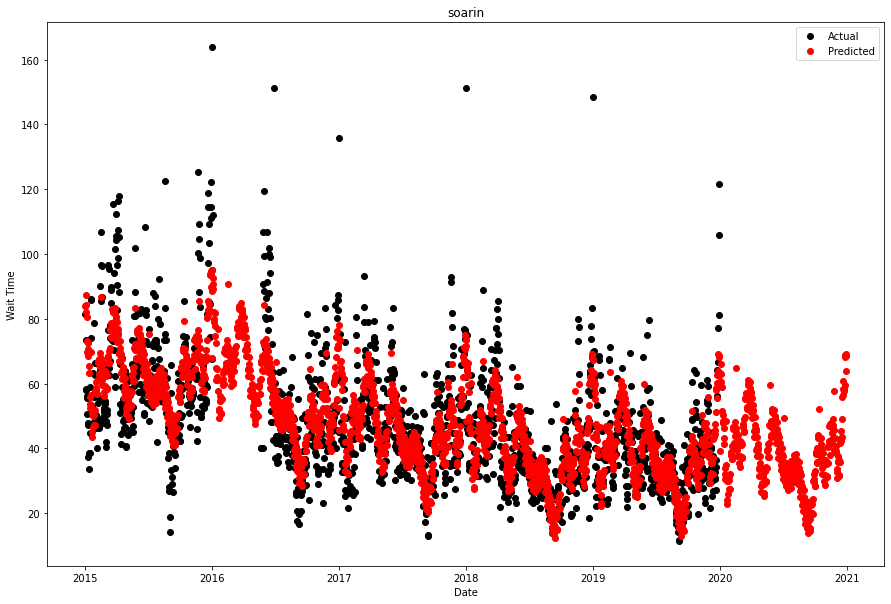

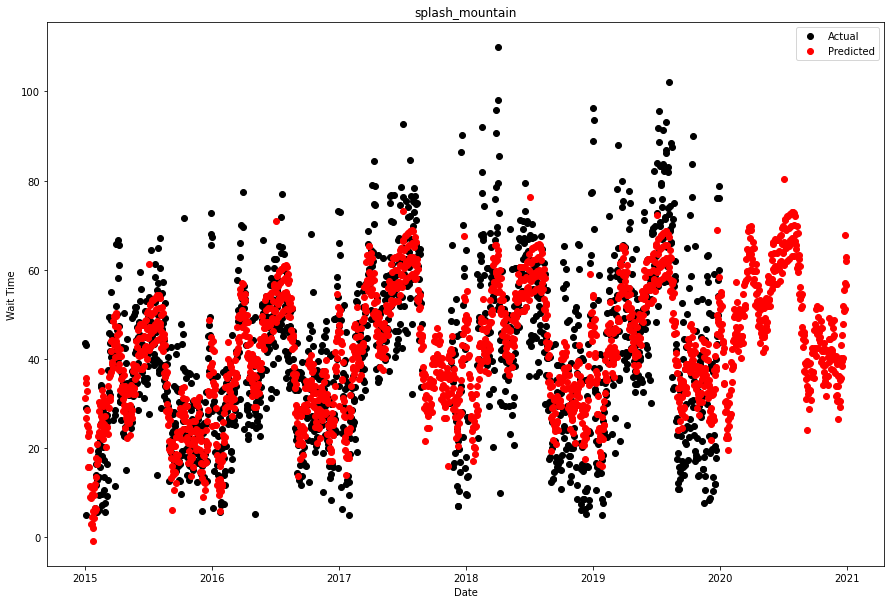

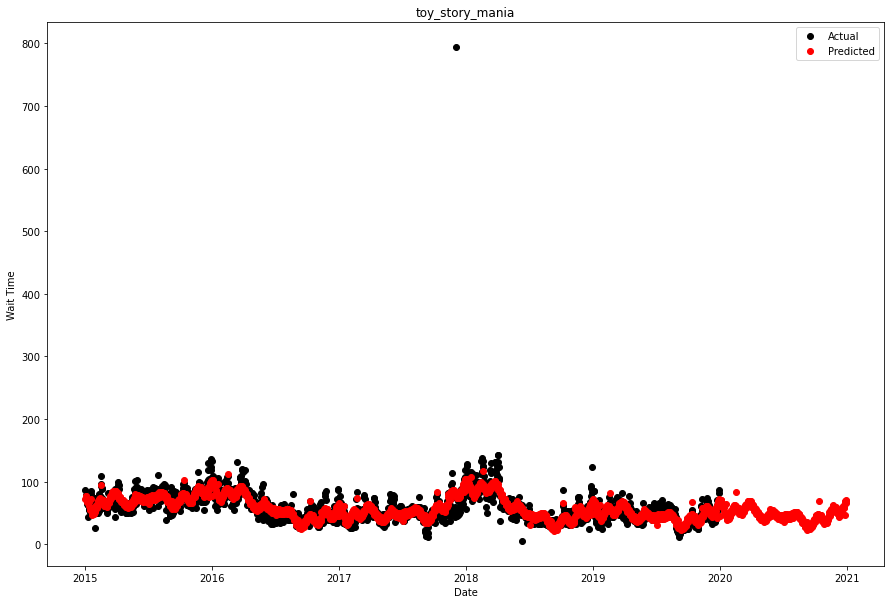

In [44]:
for i in data_sets:
    print(i)
    exec(f'plt.figure(figsize = (15,10))')
    exec(f'plt.plot_date(fb_data_{i}["ds"], fb_data_{i}["y"], color = "black")')
    exec(f'plt.plot_date(preds_{i}["ds"], preds_{i}["yhat"], color = "red")')
    exec(f'plt.xlabel("Date")')
    exec(f'plt.ylabel("Wait Time")')
    exec(f'plt.legend(["Actual", "Predicted"])')
    exec(f'plt.title("{i}")')

In [45]:
# plt.figure(figsize = (15,10))
# plt.plot_date(fb_data["ds"], fb_data["y"], color = "black")
# plt.plot_date(preds["ds"], preds["yhat"], color = "red")
# plt.xlabel("Date")
# plt.ylabel("Wait Time")
# plt.legend(["Actual", "Predicted"])
# plt.title("Dinosaur")

# plt.scatter(fb_data["y"])
# plt.scatter(np.arange(len(fb_data)), fb_data["y"], color = "black")
# plt.scatter(np.arange(len(fb_data), len(fb_data)+ len(preds)), preds["yhat"], color = "red")

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


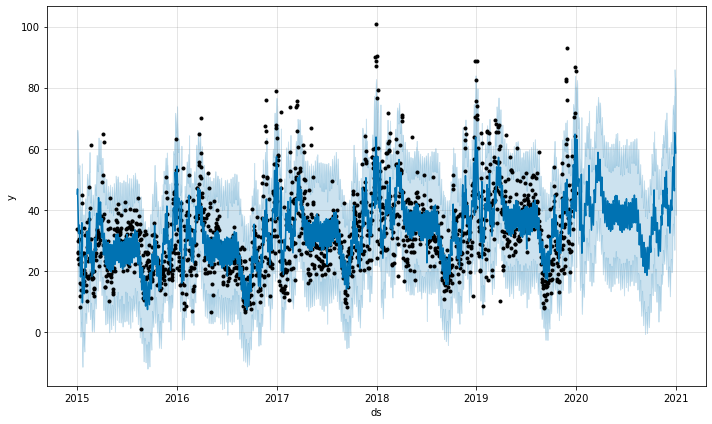

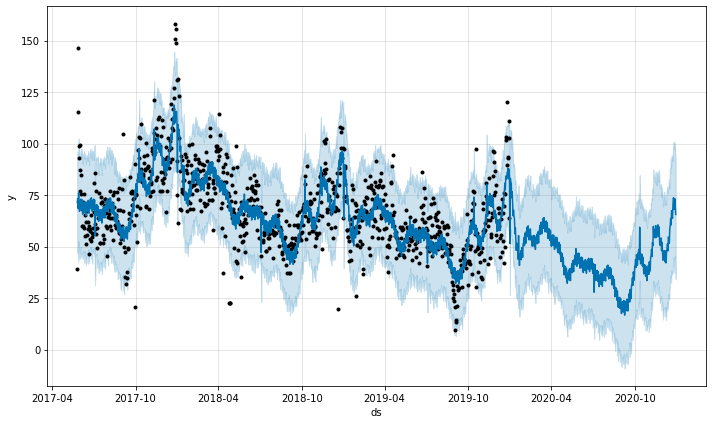

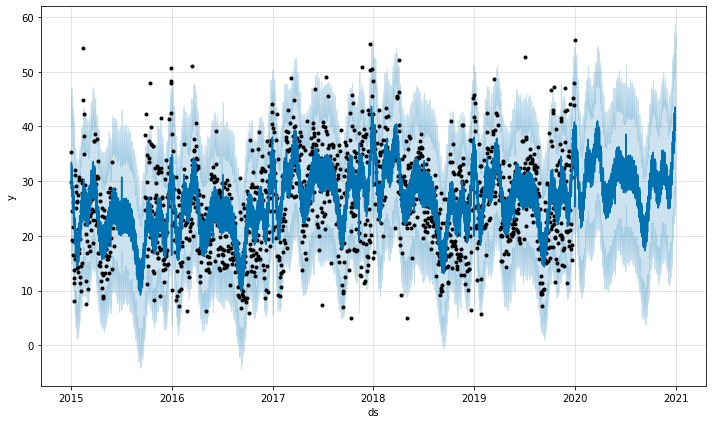

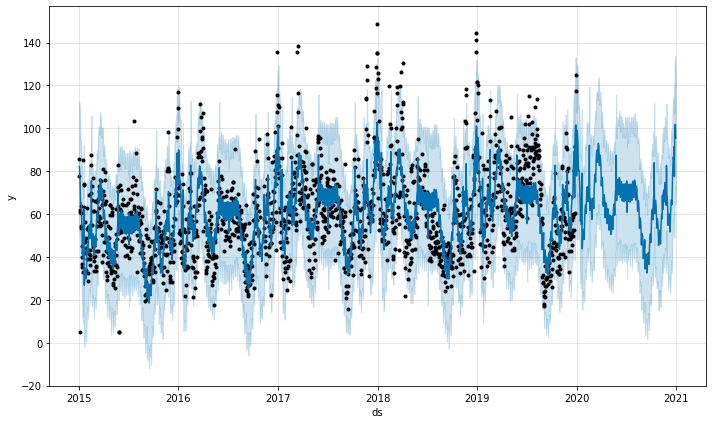

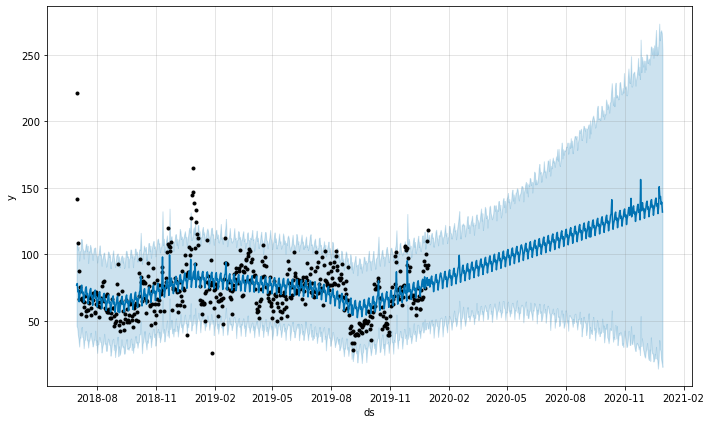

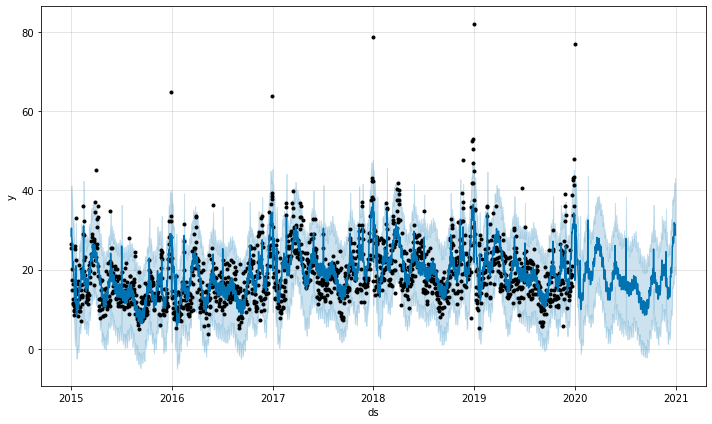

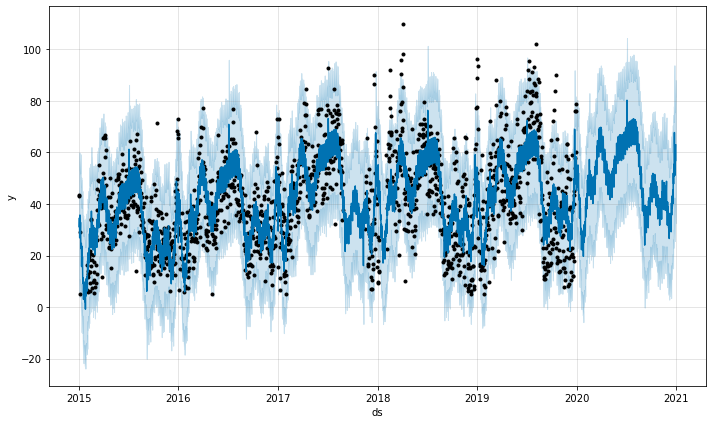

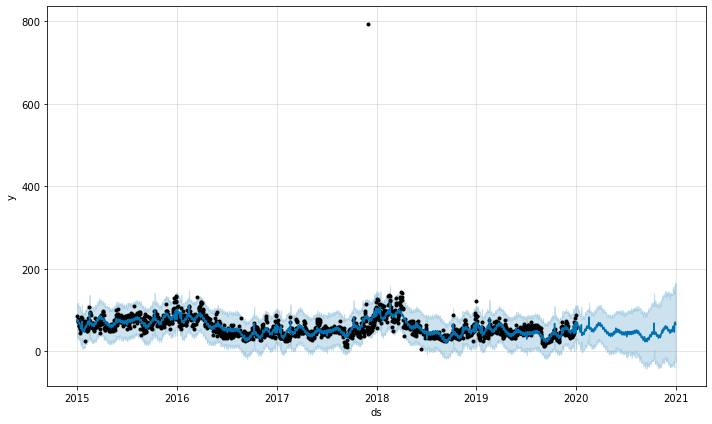

In [46]:
for i in data_sets:
    print(i)
    exec(f'm_{i}.plot(preds_{i})')

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


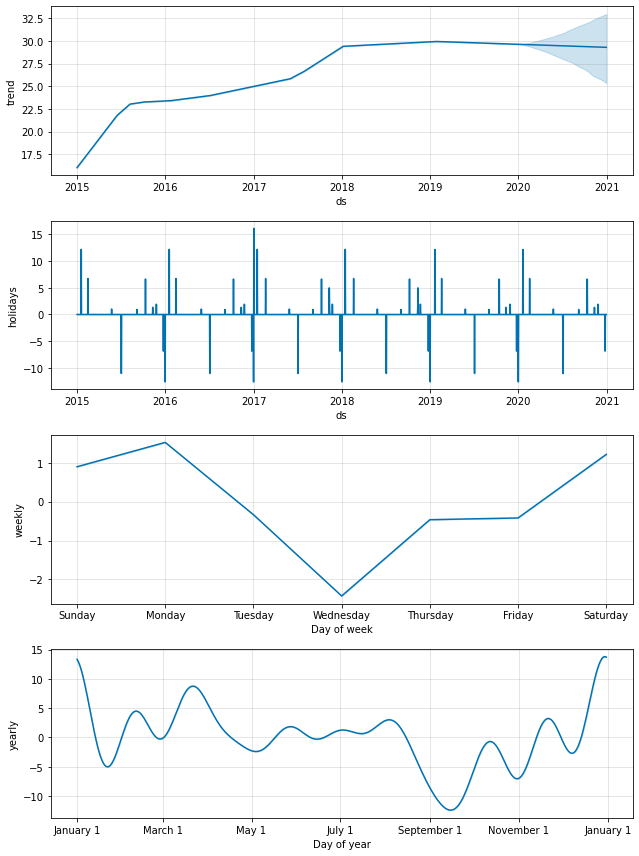

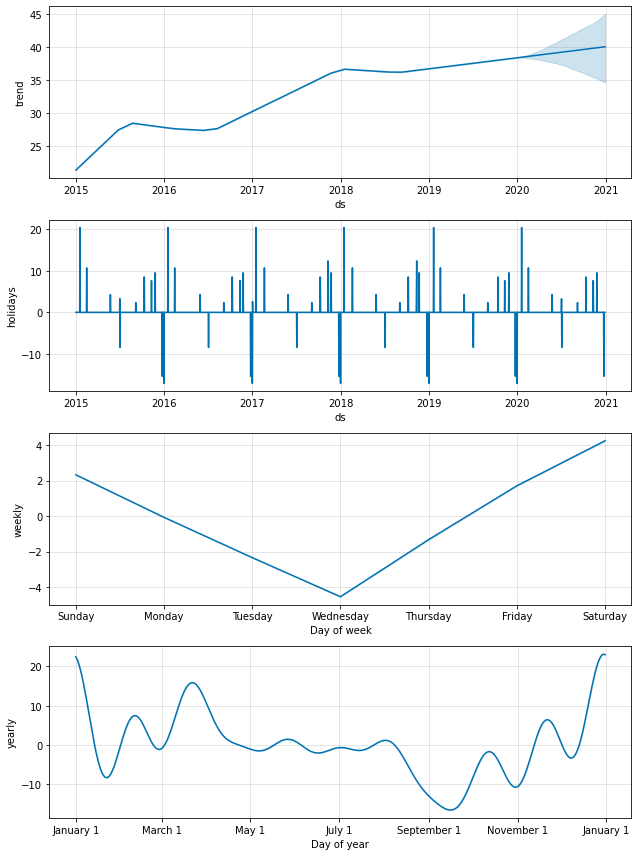

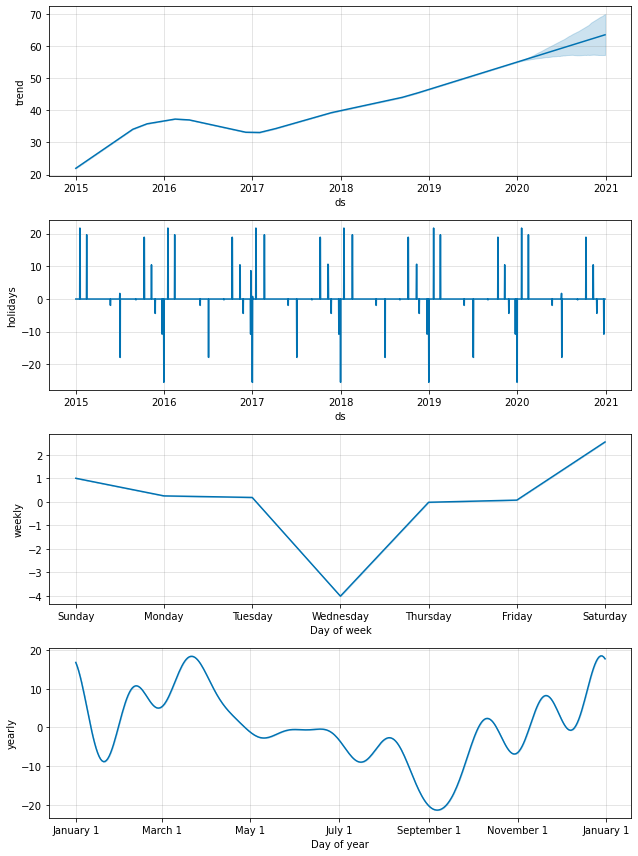

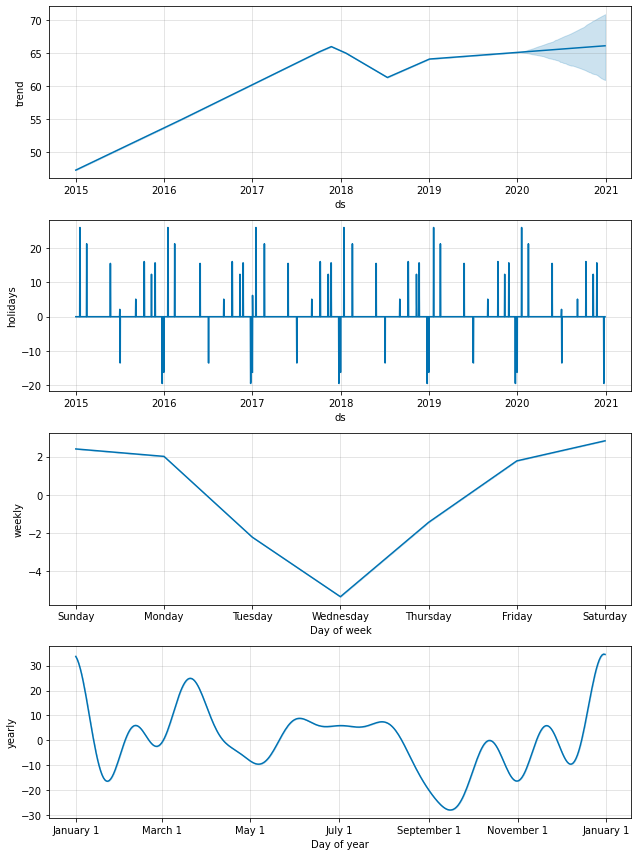

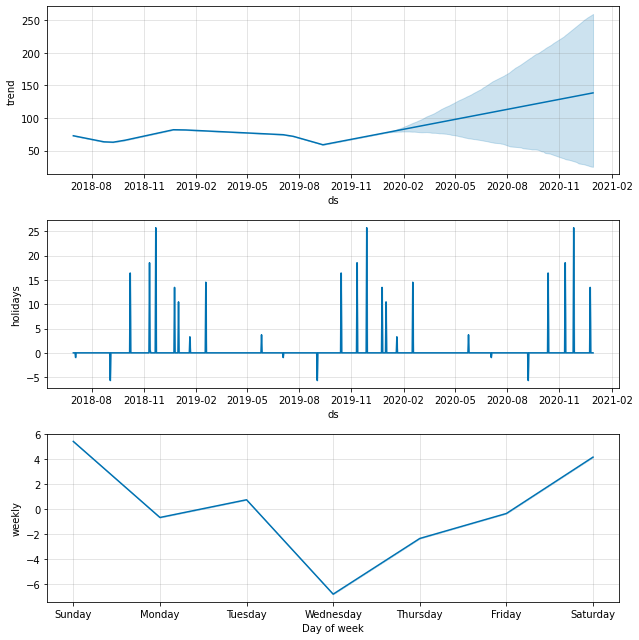

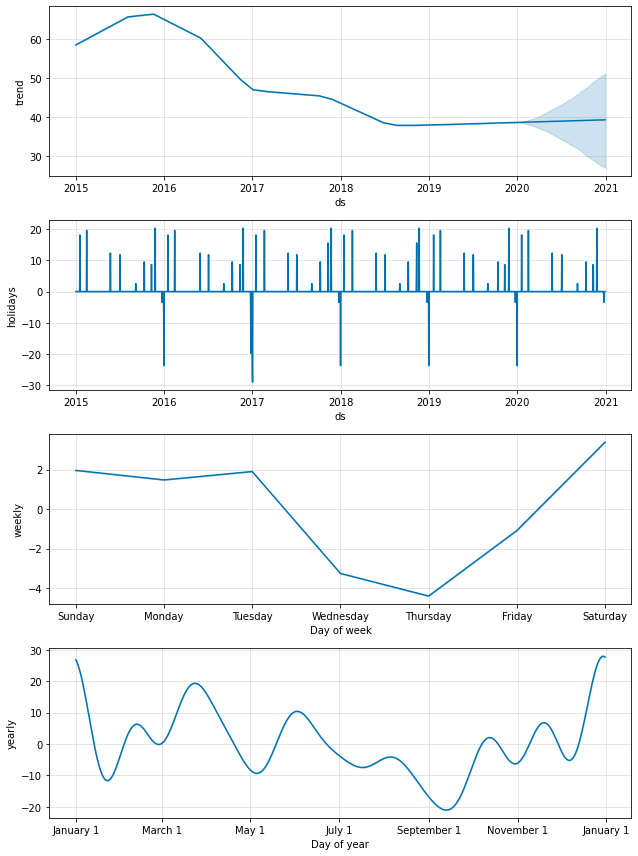

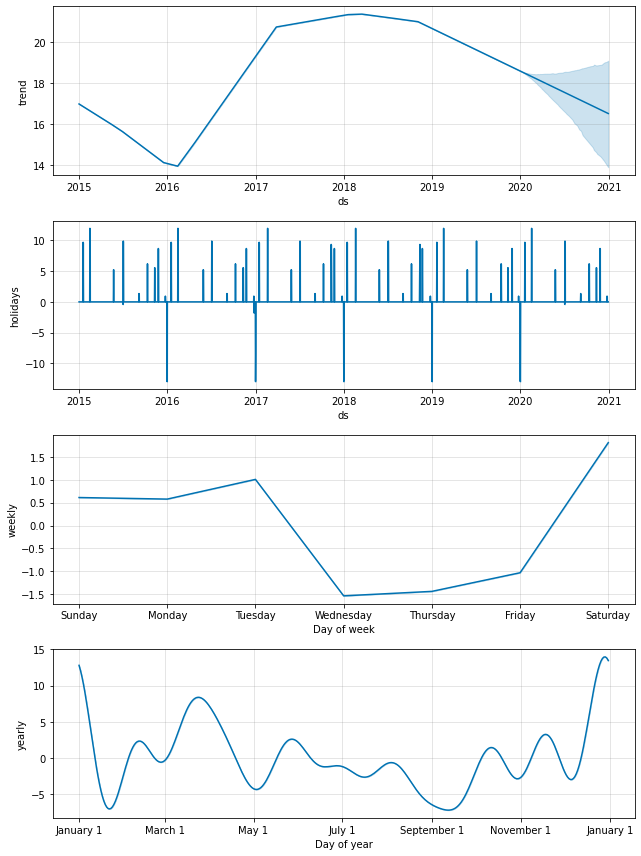

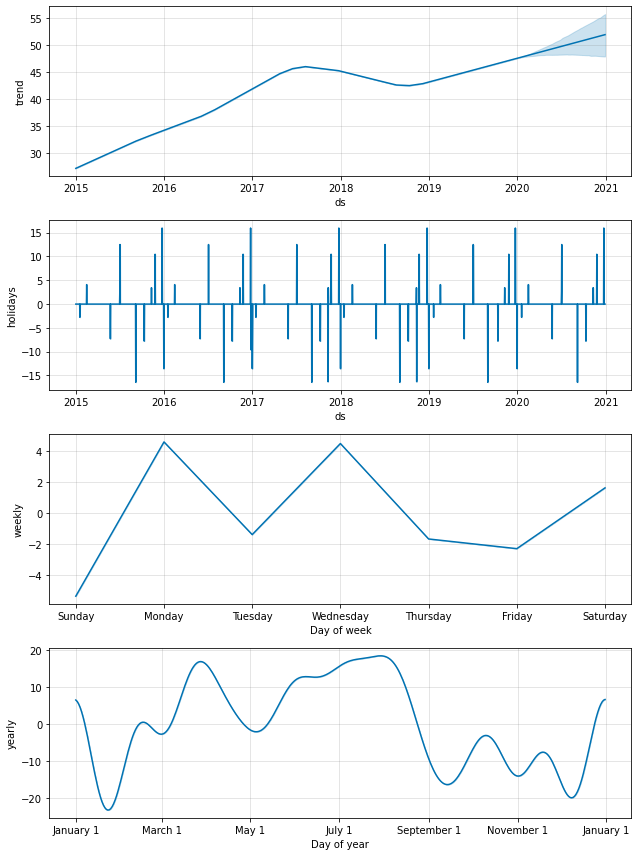

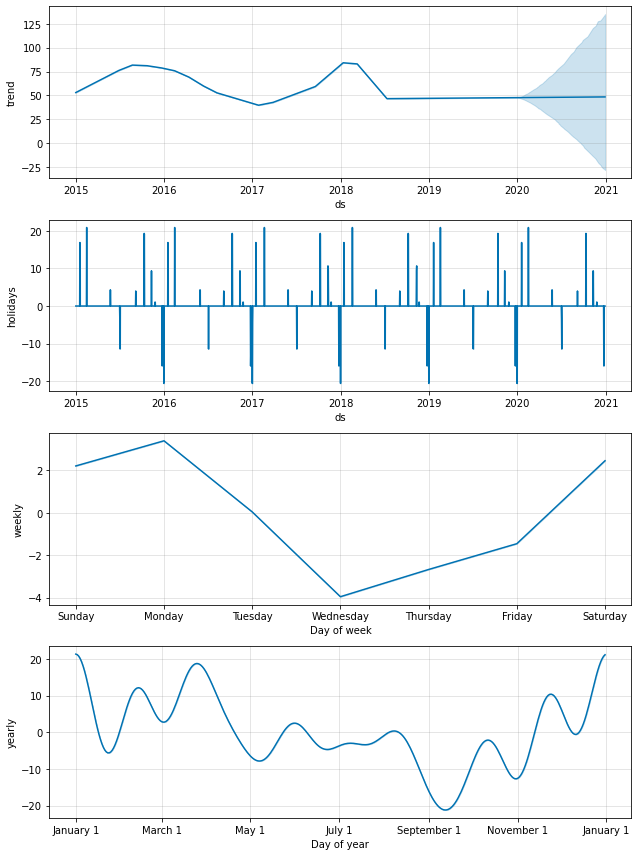

In [47]:
for i in data_sets:
    print(i)
    exec(f'm_{i}.plot_components(preds_{i})')

In [48]:
for i in data_sets:
    print(i)
    exec(f'forecast_{i} = preds_{i}.loc[len(fb_data_{i}):, :]')
    # display(eval(f'forecast_{i}.loc[forecast_{i}["yhat"].idxmin, :]'))
    print(eval(f'forecast_{i}.nsmallest(10, "yhat")[["ds", "yhat"]]'))


seven_dwarfs_train
             ds       yhat
2086 2020-09-18  46.550754
2085 2020-09-17  46.703806
2081 2020-09-13  46.859761
2079 2020-09-11  47.217570
2088 2020-09-20  48.038875
2078 2020-09-10  48.240422
2083 2020-09-15  48.703910
2074 2020-09-06  51.289631
2092 2020-09-24  51.594262
2090 2020-09-22  51.778213
dinosaur
             ds       yhat
2084 2020-09-16  14.604491
2077 2020-09-09  15.315375
2091 2020-09-23  16.576174
2083 2020-09-15  16.653223
2085 2020-09-17  16.668931
2086 2020-09-18  16.873381
2079 2020-09-11  16.902248
2078 2020-09-10  17.050145
2076 2020-09-08  17.670045
2070 2020-09-02  17.701405
expedition_everest
             ds       yhat
2084 2020-09-16  18.554054
2077 2020-09-09  19.436189
2091 2020-09-23  20.609585
2083 2020-09-15  20.744736
2070 2020-09-02  21.515373
2085 2020-09-17  21.836817
2076 2020-09-08  21.889316
2090 2020-09-22  22.282143
2078 2020-09-10  22.415763
2082 2020-09-14  23.057225
kilimanjaro_safaris
             ds       yhat
2077 2020-09-09

In [49]:
# forecast = preds.loc[len(fb_data):, :]
# display(forecast.loc[temp["yhat"].idxmin, :])
# print(forecast.nsmallest(10, "yhat")[["ds", "yhat"]])

In [50]:
# from sklearn.neural_network import MLPRegressor

# model = MLPRegressor()
# model.fit(X, y)
# print(model.score(X, y))


In [51]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split

In [52]:
# X = dinosaur_data.drop(columns = ["date", "datetime", "CleanTime"])
# y = dinosaur_data["CleanTime"]

In [53]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# regr = MLPRegressor(random_state=1).fit(X_train, y_train)
# regr.predict(X_test)
                                                    
# regr.score(X_test, y_test)

### Random Forest Model

#### Train Model

In [54]:
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train,y_train)

In [55]:
# y_test_pred=rf_model.predict(X_test)
# test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
# print('Test Set accuracy: ',test_accuracy)

In [56]:
# rf_model.score(X_test, y_test)

# Best Parks To Go To On A Given Day

# Best Day to Ride specific Ride 

### Seven Dwarfs Mine Train (MK) - 3RD WK SEPT - FRIDAY

In [115]:
forecast_seven_dwarfs_train['weekday'] = forecast_seven_dwarfs_train['ds'].apply(lambda x: x.weekday())


<ipython-input-115-bb3e64a5bd0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_seven_dwarfs_train['weekday'] = forecast_seven_dwarfs_train['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [117]:
forecast_seven_dwarfs_train.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2086 2020-09-18  46.550754        4
2085 2020-09-17  46.703806        3
2081 2020-09-13  46.859761        6
2079 2020-09-11  47.217570        4
2088 2020-09-20  48.038875        6
2078 2020-09-10  48.240422        3
2083 2020-09-15  48.703910        1
2074 2020-09-06  51.289631        6
2092 2020-09-24  51.594262        3
2090 2020-09-22  51.778213        1

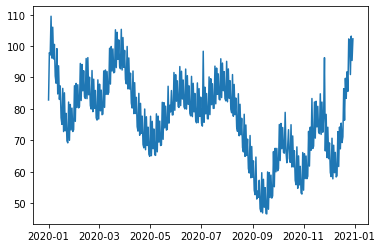

In [100]:
plt.plot(forecast_seven_dwarfs_train["ds"], forecast_seven_dwarfs_train["yhat"])
plt.show()

### Dinosaur Ride (AK) - 3RD WK SEPT - WEDNESDAY

In [118]:
forecast_dinosaur['weekday'] = forecast_dinosaur['ds'].apply(lambda x: x.weekday())

<ipython-input-118-7f2ac7f95dd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_dinosaur['weekday'] = forecast_dinosaur['ds'].apply(lambda x: x.weekday())


In [141]:
forecast_dinosaur.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2084 2020-09-16  14.604491        2
2077 2020-09-09  15.315375        2
2091 2020-09-23  16.576174        2
2083 2020-09-15  16.653223        1
2085 2020-09-17  16.668931        3
2086 2020-09-18  16.873381        4
2079 2020-09-11  16.902248        4
2078 2020-09-10  17.050145        3
2076 2020-09-08  17.670045        1
2070 2020-09-02  17.701405        2

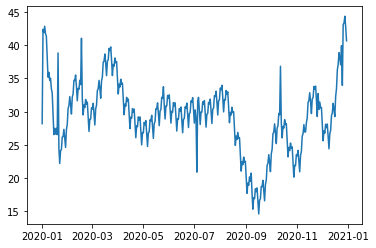

In [101]:
plt.plot(forecast_dinosaur["ds"], forecast_dinosaur["yhat"])
plt.show()

### Expedition Everest (AK) - 3RD WK SEPT - WEDNESDAY

In [139]:
forecast_expedition_everest['weekday'] = forecast_expedition_everest['ds'].apply(lambda x: x.weekday())

<ipython-input-139-22f779c100dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_expedition_everest['weekday'] = forecast_expedition_everest['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [140]:
forecast_expedition_everest.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2084 2020-09-16  18.554054        2
2077 2020-09-09  19.436189        2
2091 2020-09-23  20.609585        2
2083 2020-09-15  20.744736        1
2070 2020-09-02  21.515373        2
2085 2020-09-17  21.836817        3
2076 2020-09-08  21.889316        1
2090 2020-09-22  22.282143        1
2078 2020-09-10  22.415763        3
2082 2020-09-14  23.057225        0

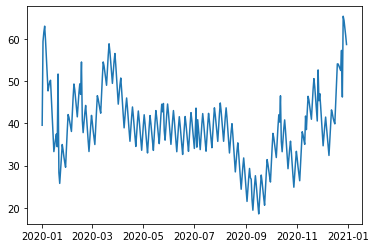

In [113]:
plt.plot(forecast_expedition_everest["ds"], forecast_expedition_everest["yhat"])
plt.show()

### Kilimanjaro Safaris (AK) - 2ND WK SEPT - WEDNESDAY

In [137]:
forecast_kilimanjaro_safaris['weekday'] = forecast_kilimanjaro_safaris['ds'].apply(lambda x: x.weekday())

<ipython-input-137-c290a3484df3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_kilimanjaro_safaris['weekday'] = forecast_kilimanjaro_safaris['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [204]:
forecast_kilimanjaro_safaris.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2077 2020-09-09  35.764447        2
2070 2020-09-02  35.985226        2
2084 2020-09-16  38.800101        2
2010 2020-07-04  39.168507        5
2063 2020-08-26  39.369137        2
2075 2020-09-07  39.548000        0
2072 2020-09-04  39.680907        4
2071 2020-09-03  39.751892        3
2076 2020-09-08  39.799114        1
2078 2020-09-10  39.989822        3

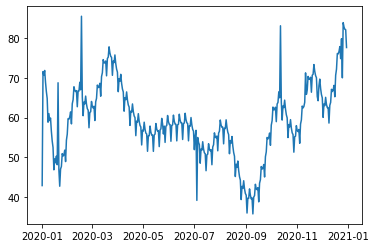

In [112]:
plt.plot(forecast_kilimanjaro_safaris["ds"], forecast_kilimanjaro_safaris["yhat"])
plt.show()

### Navi River Ride (AK) - 2ND WK SEPT - WEDNESDAY

In [135]:
forecast_navi_river['weekday'] = forecast_navi_river['ds'].apply(lambda x: x.weekday())

<ipython-input-135-70926d0dd2fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_navi_river['weekday'] = forecast_navi_river['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [136]:
forecast_navi_river.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
1202 2020-09-09  16.784840        2
1195 2020-09-02  17.560481        2
1199 2020-09-06  18.282388        6
1209 2020-09-16  18.776618        2
1206 2020-09-13  18.936214        6
1192 2020-08-30  20.006088        6
1201 2020-09-08  20.485696        1
1188 2020-08-26  20.569063        2
1194 2020-09-01  21.581730        1
1204 2020-09-11  21.865479        4

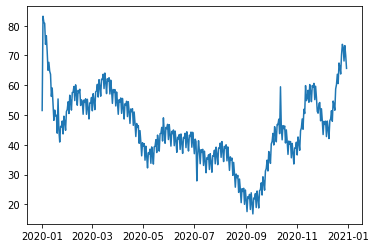

In [111]:
plt.plot(forecast_navi_river["ds"], forecast_navi_river["yhat"])
plt.show()

### Pirates of the Caribbean (MK) - 2ND WK SEPT - THURSDAY

In [133]:
forecast_pirates_of_caribbean['weekday'] = forecast_pirates_of_caribbean['ds'].apply(lambda x: x.weekday())

<ipython-input-133-8bf8791992d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_pirates_of_caribbean['weekday'] = forecast_pirates_of_caribbean['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [134]:
forecast_pirates_of_caribbean.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2078 2020-09-10  17.310251        3
2074 2020-09-06  17.871578        6
2081 2020-09-13  18.025671        6
2071 2020-09-03  18.175891        3
2079 2020-09-11  18.572152        4
2085 2020-09-17  18.943720        3
2076 2020-09-08  19.081445        1
2072 2020-09-04  19.113855        4
2067 2020-08-30  19.810852        6
2083 2020-09-15  19.971544        1

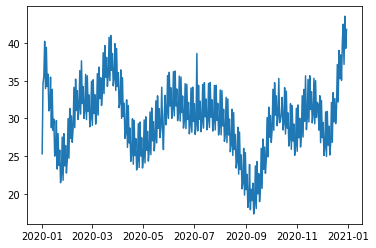

In [110]:
plt.plot(forecast_pirates_of_caribbean["ds"], forecast_pirates_of_caribbean["yhat"])
plt.show()

### Rock n' Roller Coaster (HS) - 3RD WK SEPT - WEDNESDAY

In [131]:
forecast_rock_n_rollercoaster['weekday'] = forecast_rock_n_rollercoaster['ds'].apply(lambda x: x.weekday())

<ipython-input-131-cc38e587714e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_rock_n_rollercoaster['weekday'] = forecast_rock_n_rollercoaster['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [132]:
forecast_rock_n_rollercoaster.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2084 2020-09-16  32.522652        2
2077 2020-09-09  34.424306        2
2083 2020-09-15  35.628783        1
2091 2020-09-23  36.562289        2
2085 2020-09-17  36.582847        3
2078 2020-09-10  37.815756        3
2076 2020-09-08  38.129339        1
2090 2020-09-22  38.680607        1
2070 2020-09-02  39.267344        2
2082 2020-09-14  39.961219        0

In [109]:
plt.plot(forecast_rock_n_rollercoaster["ds"], forecast_rock_n_rollercoaster["yhat"])
plt.show()

### Slinky Dog Ride (HS) - 2ND WK JAN -WEDNESDAY

In [129]:
forecast_slinky_dog['weekday'] = forecast_slinky_dog['ds'].apply(lambda x: x.weekday())

<ipython-input-129-8622a1528ff9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_slinky_dog['weekday'] = forecast_slinky_dog['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [130]:
forecast_slinky_dog.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
557 2020-01-08  71.857510        2
564 2020-01-15  73.031015        2
571 2020-01-22  74.204520        2
551 2020-01-02  75.313044        3
578 2020-01-29  75.378025        2
558 2020-01-09  76.486549        3
585 2020-02-05  76.551530        2
552 2020-01-03  77.480645        4
565 2020-01-16  77.660054        3
555 2020-01-06  77.664026        0

In [108]:
plt.plot(forecast_slinky_dog["ds"], forecast_slinky_dog["yhat"])
plt.show()

### Soarin (EC) - 2ND WK SEPT - THURSDAY

In [127]:
forecast_soarin['weekday'] = forecast_soarin['ds'].apply(lambda x: x.weekday())

<ipython-input-127-b42632e8106a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_soarin['weekday'] = forecast_soarin['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [128]:
forecast_soarin.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2078 2020-09-10  13.950646        3
2085 2020-09-17  14.550682        3
2077 2020-09-09  15.322704        2
2084 2020-09-16  15.345106        2
2071 2020-09-03  16.541063        3
2079 2020-09-11  17.113178        4
2070 2020-09-02  18.210589        2
2086 2020-09-18  18.326226        4
2072 2020-09-04  19.369579        4
2082 2020-09-14  19.659925        0

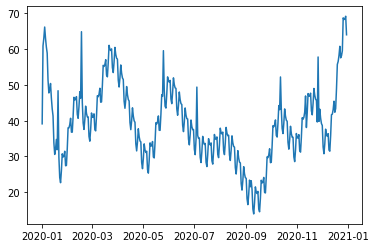

In [107]:
plt.plot(forecast_soarin["ds"], forecast_soarin["yhat"])
plt.show()

### Spaceship Earth (EC) - 2ND WK SEPT - WEDNESDAY

In [125]:
forecast_spaceship_earth['weekday'] = forecast_spaceship_earth['ds'].apply(lambda x: x.weekday())

<ipython-input-125-87a25675eb86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_spaceship_earth['weekday'] = forecast_spaceship_earth['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [126]:
forecast_spaceship_earth.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds      yhat  weekday
2077 2020-09-09  8.479687        2
2078 2020-09-10  8.535649        3
2084 2020-09-16  8.593923        2
2085 2020-09-17  8.813691        3
2079 2020-09-11  8.916217        4
2071 2020-09-03  9.033742        3
2070 2020-09-02  9.039354        2
2072 2020-09-04  9.345939        4
2086 2020-09-18  9.378398        4
1846 2020-01-22  9.930143        2

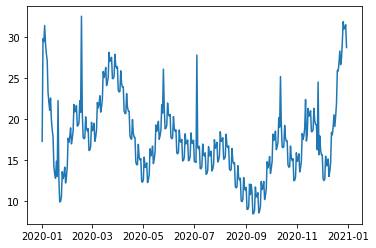

In [106]:
plt.plot(forecast_spaceship_earth["ds"], forecast_spaceship_earth["yhat"])
plt.show()

### Splash Mountain (MK) - 4TH WK JAN - SUNDAY

In [123]:
forecast_splash_mountain['weekday'] = forecast_splash_mountain['ds'].apply(lambda x: x.weekday())

<ipython-input-123-484b5bbd05bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_splash_mountain['weekday'] = forecast_splash_mountain['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [124]:
forecast_splash_mountain.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
1850 2020-01-26  19.691665        6
1848 2020-01-24  22.218970        4
1843 2020-01-19  22.257010        6
1847 2020-01-23  22.955830        3
2075 2020-09-07  24.044802        0
1845 2020-01-21  24.233915        1
1852 2020-01-28  25.104685        1
1849 2020-01-25  26.265165        5
2165 2020-12-06  26.599148        6
1854 2020-01-30  27.056933        3

In [105]:
plt.plot(forecast_splash_mountain["ds"], forecast_splash_mountain["yhat"])
plt.show()

### Toy Story Mania (HS) - 2ND WK SEPT - WEDNESDAY

In [119]:
forecast_toy_story_mania['weekday'] = forecast_toy_story_mania['ds'].apply(lambda x: x.weekday())

<ipython-input-119-1aa3a8dea33a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_toy_story_mania['weekday'] = forecast_toy_story_mania['ds'].apply(lambda x: x.weekday())


Day of Week:
<br>
<br>
0: Monday
<br>
1: Tuesday
<br>
2: Wednesday
<br>
3: Thursday
<br>
4: Friday
<br>
5: Saturday
<br>
6: Sunday


In [120]:
forecast_toy_story_mania.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2077 2020-09-09  23.447416        2
2084 2020-09-16  23.793406        2
2078 2020-09-10  24.521321        3
2085 2020-09-17  25.476798        3
2079 2020-09-11  25.611388        4
2070 2020-09-02  27.043419        2
2086 2020-09-18  27.177762        4
2083 2020-09-15  27.479632        1
2071 2020-09-03  27.609969        3
2076 2020-09-08  27.737920        1

In [102]:
plt.plot(forecast_toy_story_mania["ds"], forecast_toy_story_mania["yhat"])
plt.show()

# Best Time of Year to go to Park with Kids

### Magic Kingdom - 2ND WK SEPT - THURSDAY

Pirates of the Caribbean

In [145]:
forecast_pirates_of_caribbean.nsmallest(5, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2078 2020-09-10  17.310251        3
2074 2020-09-06  17.871578        6
2081 2020-09-13  18.025671        6
2071 2020-09-03  18.175891        3
2079 2020-09-11  18.572152        4

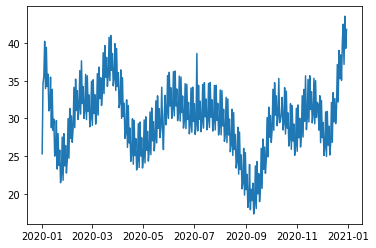

In [143]:
plt.plot(forecast_pirates_of_caribbean["ds"], forecast_pirates_of_caribbean["yhat"])
plt.show()

### Epcot - 2ND WK SEPT - WEDNESDAY

Spaceship Earth

In [157]:
forecast_spaceship_earth.nsmallest(10, "yhat")[["ds", "yhat", "weekday"]]

ds      yhat  weekday
2077 2020-09-09  8.479687        2
2078 2020-09-10  8.535649        3
2084 2020-09-16  8.593923        2
2085 2020-09-17  8.813691        3
2079 2020-09-11  8.916217        4
2071 2020-09-03  9.033742        3
2070 2020-09-02  9.039354        2
2072 2020-09-04  9.345939        4
2086 2020-09-18  9.378398        4
1846 2020-01-22  9.930143        2

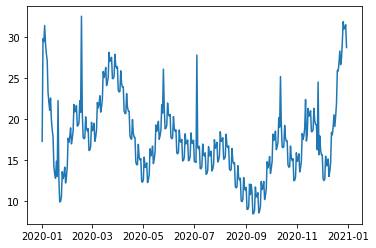

In [158]:
plt.plot(forecast_spaceship_earth["ds"], forecast_spaceship_earth["yhat"])
plt.show()

### Hollywood Studios - 2ND WK SEPT - WEDNESDAY

Toy Story Mania

In [152]:
forecast_toy_story_mania.nsmallest(5, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2077 2020-09-09  23.447416        2
2084 2020-09-16  23.793406        2
2078 2020-09-10  24.521321        3
2085 2020-09-17  25.476798        3
2079 2020-09-11  25.611388        4

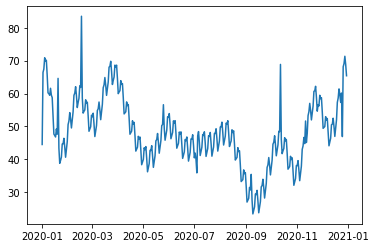

In [151]:
plt.plot(forecast_toy_story_mania["ds"], forecast_toy_story_mania["yhat"])
plt.show()

### Animal Kingdom - 2ND WK SEPT - WEDNESDAY

Dinosaur, Kilimajaro Safari, Navi River

In [210]:
ak_child_dinosaur = forecast_dinosaur[["ds", "yhat", "weekday"]]
ak_child_kilimanjaro = forecast_kilimanjaro_safaris[["ds", "yhat", "weekday"]]
ak_child_navi = forecast_navi_river[["ds", "yhat", "weekday"]]

In [212]:
ak_child_1 = ak_child_dinosaur.merge(ak_child_kilimanjaro, on='ds')
ak_child_1

ds     yhat_x  weekday_x     yhat_y  weekday_y
0   2020-01-01  28.197487          2  42.890432          2
1   2020-01-02  42.402399          3  71.555984          3
2   2020-01-03  41.918148          4  70.609026          4
3   2020-01-04  42.866911          5  71.843939          5
4   2020-01-05  41.714891          6  68.883189          6
5   2020-01-06  41.378183          0  66.564648          0
6   2020-01-07  38.443265          1  64.809233          1
7   2020-01-08  35.187604          2  58.831493          2
8   2020-01-09  35.921733          3  60.993644          3
9   2020-01-10  34.694390          4  59.234369          4
10  2020-01-11  35.041679          5  59.875416          5
11  2020-01-12  33.441523          6  56.552215          6
12  2020-01-13  32.818189          0  54.110357          0
13  2020-01-14  29.762594          1  52.473059          1
14  2020-01-15  26.552833          2  46.851717          2
15  2020-01-16  27.496264          3  49.600028          3
16  2020-01-17  26.634753          4  48.643021          4
17  2020-01-18  27.494028          5  50.284006          5
18  2020-01-19  26.538415          6  48.135648          6
19  2020-01-20  38.847917          0  68.748215          0
20  2020-01-21  24.477959          1  46.821727          1
21  2020-01-22  22.202369          2  42.729172          2
22  2020-01-23  24.134021          3  47.059475          3
23  2020-01-24  24.291619          4  47.703305          4
24  2020-01-25  26.177431          5  50.929657          5
25  2020-01-26  26.232593          6  50.317742          6
26  2020-01-27  27.342555          0  50.654828          0
27  2020-01-28  26.058344          1  51.805093          1
28  2020-01-29  24.618068          2  48.921580          2
29  2020-01-30  27.289964          3  54.301687          3
30  2020-01-31  28.078580          4  55.817499          4
31  2020-02-01  30.475002          5  59.723950          5
32  2020-02-02  30.912388          6  59.590975          6
33  2020-02-03  32.271551          0  60.201498          0
34  2020-02-04  31.102277          1  61.420310          1
35  2020-02-05  29.644796          2  58.405911          2
36  2020-02-06  32.172708          3  63.465792          3
37  2020-02-07  32.698972          4  64.486424          4
38  2020-02-08  34.725856          5  67.740984          5
39  2020-02-09  34.700134          6  66.820991          6
40  2020-02-10  35.518271          0  66.533688          0
41  2020-02-11  33.747300          1  66.770264          1
42  2020-02-12  31.645821          2  62.717000          2
43  2020-02-13  33.506430          3  66.709824          3
44  2020-02-14  33.361206          4  66.663585          4
45  2020-02-15  34.731167          5  68.879066          5
46  2020-02-16  34.080988          6  66.973942          6
47  2020-02-17  41.051899          0  85.476254          0
48  2020-02-18  32.041371          1  65.208496          1
49  2020-02-19  29.505333          2  60.465424          2
50  2020-02-20  31.018744          3  63.901074          3
51  2020-02-21  30.621638          4  63.441309          4
52  2020-02-22  31.840265          5  65.393929          5
53  2020-02-23  31.141740          6  63.379541          6
54  2020-02-24  31.438770          0  62.228343          0
55  2020-02-25  29.310204          1  61.847904          1
56  2020-02-26  27.021817          2  57.434051          2
57  2020-02-27  28.868653          3  61.325351          3
58  2020-02-28  28.880553          4  61.432475          4
59  2020-02-29  30.571767          5  64.045484          5
60  2020-03-01  30.395955          6  62.765222          6
61  2020-03-02  31.251303          0  62.400653          0
62  2020-03-03  29.701474          1  62.837218          1
63  2020-03-04  27.996802          2  59.248326          2
64  2020-03-05  30.417052          3  63.950404          3
65  2020-03-06  30.977338          4  64.832827          4
66  2020-03-07  33.178110          5  68.165732          5


In [213]:
ak_child_2 = ak_child_1.merge(ak_child_navi, on='ds')
ak_child_2

ds     yhat_x  weekday_x     yhat_y  weekday_y       yhat  weekday
0   2020-01-01  28.197487          2  42.890432          2  51.512263        2
1   2020-01-02  42.402399          3  71.555984          3  83.164618        3
2   2020-01-03  41.918148          4  70.609026          4  81.124062        4
3   2020-01-04  42.866911          5  71.843939          5  80.781380        5
4   2020-01-05  41.714891          6  68.883189          6  73.716122        6
5   2020-01-06  41.378183          0  66.564648          0  76.619835        0
6   2020-01-07  38.443265          1  64.809233          1  71.287382        1
7   2020-01-08  35.187604          2  58.831493          2  65.026207        2
8   2020-01-09  35.921733          3  60.993644          3  67.695730        3
9   2020-01-10  34.694390          4  59.234369          4  64.699887        4
10  2020-01-11  35.041679          5  59.875416          5  63.686916        5
11  2020-01-12  33.441523          6  56.552215          6  56.246772        6
12  2020-01-13  32.818189          0  54.110357          0  59.074599        0
13  2020-01-14  29.762594          1  52.473059          1  53.962030        1
14  2020-01-15  26.552833          2  46.851717          2  48.206611        2
15  2020-01-16  27.496264          3  49.600028          3  51.651523        3
16  2020-01-17  26.634753          4  48.643021          4  49.678588        4
17  2020-01-18  27.494028          5  50.284006          5  49.908688        5
18  2020-01-19  26.538415          6  48.135648          6  43.899914        6
19  2020-01-20  38.847917          0  68.748215          0  55.394381        0
20  2020-01-21  24.477959          1  46.821727          1  44.897995        1
21  2020-01-22  22.202369          2  42.729172          2  40.915792        2
22  2020-01-23  24.134021          3  47.059475          3  46.167739        3
23  2020-01-24  24.291619          4  47.703305          4  45.995228        4
24  2020-01-25  26.177431          5  50.929657          5  47.979995        5
25  2020-01-26  26.232593          6  50.317742          6  43.643211        6
26  2020-01-27  27.342555          0  50.654828          0  49.610680        0
27  2020-01-28  26.058344          1  51.805093          1  47.605845        1
28  2020-01-29  24.618068          2  48.921580          2  44.860855        2
29  2020-01-30  27.289964          3  54.301687          3  51.157839        3
30  2020-01-31  28.078580          4  55.817499          4  51.823316        4
31  2020-02-01  30.475002          5  59.723950          5  54.429849        5
32  2020-02-02  30.912388          6  59.590975          6  50.495224        6
33  2020-02-03  32.271551          0  60.201498          0  56.647580        0
34  2020-02-04  31.102277          1  61.420310          1  54.618199        1
35  2020-02-05  29.644796          2  58.405911          2  51.652211        2
36  2020-02-06  32.172708          3  63.465792          3  57.549380        3
37  2020-02-07  32.698972          4  64.486424          4  57.657920        4
38  2020-02-08  34.725856          5  67.740984          5  59.575444        5
39  2020-02-09  34.700134          6  66.820991          6  54.847378        6
40  2020-02-10  35.518271          0  66.533688          0  60.131265        0
41  2020-02-11  33.747300          1  66.770264          1  57.188697        1
42  2020-02-12  31.645821          2  62.717000          2  53.295172        2
43  2020-02-13  33.506430          3  66.709824          3  58.280036        3
44  2020-02-14  33.361206          4  66.663585          4  57.519496        4
45  2020-02-15  34.731167          5  68.879066          5  58.636844        5
46  2020-02-16  34.080988          6  66.973942          6  53.200207        6
47  2020-02-17  41.051899          0  85.476254          0  55.100134        0
48  2020-02-18  32.041371          1  65.208496          1  54.471919        1
49  2020-02-19  29.505333          2  60.465424          2  50

In [214]:
ak_child_2['yhat_avg'] = (ak_child_2['yhat_x'] + ak_child_2['yhat_y'] + ak_child_2['yhat'])/3
ak_child_2

ds     yhat_x  weekday_x     yhat_y  weekday_y       yhat  \
0   2020-01-01  28.197487          2  42.890432          2  51.512263   
1   2020-01-02  42.402399          3  71.555984          3  83.164618   
2   2020-01-03  41.918148          4  70.609026          4  81.124062   
3   2020-01-04  42.866911          5  71.843939          5  80.781380   
4   2020-01-05  41.714891          6  68.883189          6  73.716122   
5   2020-01-06  41.378183          0  66.564648          0  76.619835   
6   2020-01-07  38.443265          1  64.809233          1  71.287382   
7   2020-01-08  35.187604          2  58.831493          2  65.026207   
8   2020-01-09  35.921733          3  60.993644          3  67.695730   
9   2020-01-10  34.694390          4  59.234369          4  64.699887   
10  2020-01-11  35.041679          5  59.875416          5  63.686916   
11  2020-01-12  33.441523          6  56.552215          6  56.246772   
12  2020-01-13  32.818189          0  54.110357          0  59.074599   
13  2020-01-14  29.762594          1  52.473059          1  53.962030   
14  2020-01-15  26.552833          2  46.851717          2  48.206611   
15  2020-01-16  27.496264          3  49.600028          3  51.651523   
16  2020-01-17  26.634753          4  48.643021          4  49.678588   
17  2020-01-18  27.494028          5  50.284006          5  49.908688   
18  2020-01-19  26.538415          6  48.135648          6  43.899914   
19  2020-01-20  38.847917          0  68.748215          0  55.394381   
20  2020-01-21  24.477959          1  46.821727          1  44.897995   
21  2020-01-22  22.202369          2  42.729172          2  40.915792   
22  2020-01-23  24.134021          3  47.059475          3  46.167739   
23  2020-01-24  24.291619          4  47.703305          4  45.995228   
24  2020-01-25  26.177431          5  50.929657          5  47.979995   
25  2020-01-26  26.232593          6  50.317742          6  43.643211   
26  2020-01-27  27.342555          0  50.654828          0  49.610680   
27  2020-01-28  26.058344          1  51.805093          1  47.605845   
28  2020-01-29  24.618068          2  48.921580          2  44.860855   
29  2020-01-30  27.289964          3  54.301687          3  51.157839   
30  2020-01-31  28.078580          4  55.817499          4  51.823316   
31  2020-02-01  30.475002          5  59.723950          5  54.429849   
32  2020-02-02  30.912388          6  59.590975          6  50.495224   
33  2020-02-03  32.271551          0  60.201498          0  56.647580   
34  2020-02-04  31.102277          1  61.420310          1  54.618199   
35  2020-02-05  29.644796          2  58.405911          2  51.652211   
36  2020-02-06  32.172708          3  63.465792          3  57.549380   
37  2020-02-07  32.698972          4  64.486424          4  57.657920   
38  2020-02-08  34.725856          5  67.740984          5  59.575444   
39  2020-02-09  34.700134          6  66.820991          6  54.847378   
40  2020-02-10  35.518271          0  66.533688          0  60.131265   
41  2020-02-11  33.747300          1  66.770264          1  57.188697   
42  2020-02-12  31.645821          2  62.717000          2  53.295172   
43  2020-02-13  33.506430          3  66.709824          3  58.280036   
44  2020-02-14  33.361206          4  66.663585          4  57.519496   
45  2020-02-15  34.731167          5  68.879066          5  58.636844   
46  2020-02-16  34.080988          6  66.973942          6  53.200207   
47  2020-02-17  41.051899          0  85.476254          0  55.100134   
48  2020-02-18  32.041371          1  65.208496          1  54.471919   
49  2020-02-19  29.505333          2  60.465424          2  50.243467   
50  2020-02-20  31.018744          3  63.901074          3  55.036708   
51  2020-02-21  30.621638          4  63.441309          4  54.229722   
52  2020-02-22  31.840265          5  65.393929          5  55.443191   
53  2020-02-23  31.141740          6  63.379541          6  50.238353 

In [215]:
ak_child_2 = ak_child_2[['ds', 'yhat_avg', 'weekday_x']]
ak_child_2.nsmallest(5, "yhat_avg")[["ds", "yhat_avg", "weekday_x"]]

ds   yhat_avg  weekday_x
252 2020-09-09  22.621554          2
245 2020-09-02  23.749038          2
259 2020-09-16  24.060403          2
251 2020-09-08  25.984952          1
249 2020-09-06  26.093867          6

# Best Time of Year to go to Park Without Kids

### Magic Kingdom - 3RD WK SEPT -  SUNDAY

Seven Dwarfs Mine Train, Splash Mountain

In [194]:
mk_adult_seven = forecast_seven_dwarfs_train[["ds", "yhat", "weekday"]]
mk_adult_seven

ds        yhat  weekday
1825 2020-01-01   82.841645        2
1826 2020-01-02   97.903925        3
1827 2020-01-03   97.160201        4
1828 2020-01-04  109.505002        5
1829 2020-01-05   96.182904        6
1830 2020-01-06  106.022768        0
1831 2020-01-07   95.911092        1
1832 2020-01-08  100.542446        2
1833 2020-01-09   90.472017        3
1834 2020-01-10   88.181326        4
1835 2020-01-11   99.185466        5
1836 2020-01-12   84.752479        6
1837 2020-01-13   93.729402        0
1838 2020-01-14   83.015266        1
1839 2020-01-15   87.311317        2
1840 2020-01-16   77.173495        3
1841 2020-01-17   75.078212        4
1842 2020-01-18   86.529795        5
1843 2020-01-19   72.780198        6
1844 2020-01-20   85.122047        0
1845 2020-01-21   73.029467        1
1846 2020-01-22   78.574426        2
1847 2020-01-23   69.814483        3
1848 2020-01-24   69.192081        4
1849 2020-01-25   82.176276        5
1850 2020-01-26   69.983294        6
1851 2020-01-27   81.403864        0
1852 2020-01-28   73.277606        1
1853 2020-01-29   80.244676        2
1854 2020-01-30   72.799692        3
1855 2020-01-31   73.358938        4
1856 2020-02-01   87.369175        5
1857 2020-02-02   76.028644        6
1858 2020-02-03   88.114727        0
1859 2020-02-04   80.458546        1
1860 2020-02-05   87.696692        2
1861 2020-02-06   80.325129        3
1862 2020-02-07   80.766235        4
1863 2020-02-08   94.477367        5
1864 2020-02-09   82.671481        6
1865 2020-02-10   94.144349        0
1866 2020-02-11   85.748609        1
1867 2020-02-12   92.144905        2
1868 2020-02-13   83.855125        3
1869 2020-02-14   83.328775        4
1870 2020-02-15   96.050837        5
1871 2020-02-16   83.261707        6
1872 2020-02-17   96.328879        0
1873 2020-02-18   84.494631        1
1874 2020-02-19   90.078051        2
1875 2020-02-20   81.076289        3
1876 2020-02-21   79.956222        4
1877 2020-02-22   92.216808        5
1878 2020-02-23   79.108765        6
1879 2020-02-24   89.460936        0
1880 2020-02-25   80.153643        1
1881 2020-02-26   85.869269        2
1882 2020-02-27   77.145104        3
1883 2020-02-28   76.439485        4
1884 2020-02-29   89.239591        5
1885 2020-03-01   76.781485        6
1886 2020-03-02   87.876902        0
1887 2020-03-03   79.387078        1
1888 2020-03-04   85.973840        2
1889 2020-03-05   78.152983        3
1890 2020-03-06   78.360942        4
1891 2020-03-07   92.063129        5
1892 2020-03-08   80.474475        6
1893 2020-03-09   92.386712        0
1894 2020-03-10   84.642633        1
1895 2020-03-11   91.887573        2
1896 2020-03-12   84.623111        3
1897 2020-03-13   85.274011        4
1898 2020-03-14   99.296741        5
1899 2020-03-15   87.900138        6
1900 2020-03-16   99.872740        0
1901 2020-03-17   92.057014        1
1902 2020-03-18   99.100746        2
1903 2020-03-19   91.510589        3
1904 2020-03-20   91.718784        4
1905 2020-03-21  105.191422        5
1906 2020-03-22   93.148808        6
1907 2020-03-23  104.392447        0
1908 2020-03-24   95.778931        1
1909 2020-03-25  101.970956        2
1910 2020-03-26   93.490501        3
1911 2020-03-27   92.785196        4
1912 2020-03-28  105.336231        5
1913 2020-03-29   92.378415        6
1914 2020-03-30  102.726869        0
1915 2020-03-31   93.250671        1
1916 2020-04-01   98.623662        2
1917 2020-04-02   89.377475        3
1918 2020-04-03   87.967784        4
1919 2020-04-04   99.882157        5
1920 2020-04-05   86.360088        6
1921 2020-04-06   96.219729        0
1922 2020-04-07   86.331596        1
1923 2020-04-08   91.369485        2
1924 2020-04-09   81.863635        3
1925 2020-04-10   80.267142        4
1926 2020-04-11   92.063991        5
1927 2020-04-12   78.489287        6
1928 2020-04-13   88.356185        0
1929 2020-04-14   78.529795        1
1930 2020-04-15   83.678295        2
1931 2020-04-16   74.326276        3
1932 2020-04-17  

In [195]:
mk_adult_splash = forecast_splash_mountain[["ds", "yhat", "weekday"]]
mk_adult_splash

ds       yhat  weekday
1825 2020-01-01  45.083366        2
1826 2020-01-02  52.316258        3
1827 2020-01-03  51.221986        4
1828 2020-01-04  54.393289        5
1829 2020-01-05  46.447932        6
1830 2020-01-06  55.141497        0
1831 2020-01-07  47.757337        1
1832 2020-01-08  51.995958        2
1833 2020-01-09  44.097257        3
1834 2020-01-10  41.588624        4
1835 2020-01-11  43.525063        5
1836 2020-01-12  34.549292        6
1837 2020-01-13  42.437507        0
1838 2020-01-14  34.488888        1
1839 2020-01-15  38.414630        2
1840 2020-01-16  30.459953        3
1841 2020-01-17  28.152105        4
1842 2020-01-18  30.540508        5
1843 2020-01-19  22.257010        6
1844 2020-01-20  28.287764        0
1845 2020-01-21  24.233915        1
1846 2020-01-22  29.459540        2
1847 2020-01-23  22.955830        3
1848 2020-01-24  22.218970        4
1849 2020-01-25  26.265165        5
1850 2020-01-26  19.691665        6
1851 2020-01-27  30.223602        0
1852 2020-01-28  25.104685        1
1853 2020-01-29  31.987513        2
1854 2020-01-30  27.056933        3
1855 2020-01-31  27.779414        4
1856 2020-02-01  33.144556        5
1857 2020-02-02  27.726677        6
1858 2020-02-03  39.232110        0
1859 2020-02-04  34.890260        1
1860 2020-02-05  42.344167        2
1861 2020-02-06  37.773991        3
1862 2020-02-07  38.646407        4
1863 2020-02-08  43.956007        5
1864 2020-02-09  38.286676        6
1865 2020-02-10  49.358564        0
1866 2020-02-11  44.418730        1
1867 2020-02-12  51.131202        2
1868 2020-02-13  45.699890        3
1869 2020-02-14  45.617356        4
1870 2020-02-15  49.905545        5
1871 2020-02-16  43.176474        6
1872 2020-02-17  57.273061        0
1873 2020-02-18  47.186333        1
1874 2020-02-19  52.890341        2
1875 2020-02-20  46.518960        3
1876 2020-02-21  45.586859        4
1877 2020-02-22  49.135208        5
1878 2020-02-23  41.791968        6
1879 2020-02-24  51.317866        0
1880 2020-02-25  44.996144        1
1881 2020-02-26  50.521853        2
1882 2020-02-27  44.124152        3
1883 2020-02-28  43.314605        4
1884 2020-02-29  47.127620        5
1885 2020-03-01  40.180998        6
1886 2020-03-02  50.222254        0
1887 2020-03-03  44.518767        1
1888 2020-03-04  50.747547        2
1889 2020-03-05  45.118029        3
1890 2020-03-06  45.120905        4
1891 2020-03-07  49.769111        5
1892 2020-03-08  43.658917        6
1893 2020-03-09  54.516779        0
1894 2020-03-10  49.589994        1
1895 2020-03-11  56.536922        2
1896 2020-03-12  51.550196        3
1897 2020-03-13  52.105904        4
1898 2020-03-14  57.204859        5
1899 2020-03-15  51.433902        6
1900 2020-03-16  62.512891        0
1901 2020-03-17  57.685410        1
1902 2020-03-18  64.608985        2
1903 2020-03-19  59.478196        3
1904 2020-03-20  59.773711        4
1905 2020-03-21  64.503332        5
1906 2020-03-22  58.263033        6
1907 2020-03-23  68.783630        0
1908 2020-03-24  63.321152        1
1909 2020-03-25  69.546671        2
1910 2020-03-26  63.669047        3
1911 2020-03-27  63.183564        4
1912 2020-03-28  67.112614        5
1913 2020-03-29  60.066371        6
1914 2020-03-30  69.789137        0
1915 2020-03-31  63.549420        1
1916 2020-04-01  69.029526        2
1917 2020-04-02  62.448090        3
1918 2020-04-03  61.308577        4
1919 2020-04-04  64.639865        5
1920 2020-04-05  57.056878        6
1921 2020-04-06  66.306948        0
1922 2020-04-07  59.659954        1
1923 2020-04-08  64.798015        2
1924 2020-04-09  57.938173        3
1925 2020-04-10  56.581075        4
1926 2020-04-11  59.751754        5
1927 2020-04-12  52.060499        6
1928 2020-04-13  61.249440        0
1929 2020-04-14  54.582930        1
1930 2020-04-15  59.737468        2
1931 2020-04-16  52.924603        3
1932 2020-04-17  51.639807        4
1933 2020-04-18  54.903436        5
1934 2020-04-19  47.321737        6
1935 2020-04-20  

In [196]:
mk_adult = mk_adult_seven.merge(mk_adult_splash, on='ds')

In [198]:
mk_adult['yhat'] = (mk_adult['yhat_x'] + mk_adult['yhat_y'])/2
mk_adult

ds      yhat_x  weekday_x     yhat_y  weekday_y       yhat
0   2020-01-01   82.841645          2  45.083366          2  63.962505
1   2020-01-02   97.903925          3  52.316258          3  75.110092
2   2020-01-03   97.160201          4  51.221986          4  74.191093
3   2020-01-04  109.505002          5  54.393289          5  81.949145
4   2020-01-05   96.182904          6  46.447932          6  71.315418
5   2020-01-06  106.022768          0  55.141497          0  80.582132
6   2020-01-07   95.911092          1  47.757337          1  71.834215
7   2020-01-08  100.542446          2  51.995958          2  76.269202
8   2020-01-09   90.472017          3  44.097257          3  67.284637
9   2020-01-10   88.181326          4  41.588624          4  64.884975
10  2020-01-11   99.185466          5  43.525063          5  71.355265
11  2020-01-12   84.752479          6  34.549292          6  59.650886
12  2020-01-13   93.729402          0  42.437507          0  68.083455
13  2020-01-14   83.015266          1  34.488888          1  58.752077
14  2020-01-15   87.311317          2  38.414630          2  62.862973
15  2020-01-16   77.173495          3  30.459953          3  53.816724
16  2020-01-17   75.078212          4  28.152105          4  51.615158
17  2020-01-18   86.529795          5  30.540508          5  58.535152
18  2020-01-19   72.780198          6  22.257010          6  47.518604
19  2020-01-20   85.122047          0  28.287764          0  56.704905
20  2020-01-21   73.029467          1  24.233915          1  48.631691
21  2020-01-22   78.574426          2  29.459540          2  54.016983
22  2020-01-23   69.814483          3  22.955830          3  46.385157
23  2020-01-24   69.192081          4  22.218970          4  45.705526
24  2020-01-25   82.176276          5  26.265165          5  54.220721
25  2020-01-26   69.983294          6  19.691665          6  44.837479
26  2020-01-27   81.403864          0  30.223602          0  55.813733
27  2020-01-28   73.277606          1  25.104685          1  49.191145
28  2020-01-29   80.244676          2  31.987513          2  56.116094
29  2020-01-30   72.799692          3  27.056933          3  49.928313
30  2020-01-31   73.358938          4  27.779414          4  50.569176
31  2020-02-01   87.369175          5  33.144556          5  60.256865
32  2020-02-02   76.028644          6  27.726677          6  51.877660
33  2020-02-03   88.114727          0  39.232110          0  63.673419
34  2020-02-04   80.458546          1  34.890260          1  57.674403
35  2020-02-05   87.696692          2  42.344167          2  65.020429
36  2020-02-06   80.325129          3  37.773991          3  59.049560
37  2020-02-07   80.766235          4  38.646407          4  59.706321
38  2020-02-08   94.477367          5  43.956007          5  69.216687
39  2020-02-09   82.671481          6  38.286676          6  60.479079
40  2020-02-10   94.144349          0  49.358564          0  71.751457
41  2020-02-11   85.748609          1  44.418730          1  65.083670
42  2020-02-12   92.144905          2  51.131202          2  71.638053
43  2020-02-13   83.855125          3  45.699890          3  64.777508
44  2020-02-14   83.328775          4  45.617356          4  64.473065
45  2020-02-15   96.050837          5  49.905545          5  72.978191
46  2020-02-16   83.261707          6  43.176474          6  63.219090
47  2020-02-17   96.328879          0  57.273061          0  76.800970
48  2020-02-18   84.494631          1  47.186333          1  65.840482
49  2020-02-19   90.078051          2  52.890341          2  71.484196
50  2020-02-20   81.076289          3  46.518960          3  63.797625
51  2020-02-21   79.956222          4  45.586859          4  62.771540
52  2020-02-22   92.216808          5  49.135208          5  70.676008
53  2020-02-23   79.108765          6  41.791968          6  60.450367
54  2020-02-24   89.460936          0  51.317866          0  70.389401
55  2020-02-25   80.153643          

In [201]:
mk_adult = mk_adult[['ds', 'yhat', 'weekday_x']]
mk_adult.nsmallest(5, "yhat")[["ds", "yhat", "weekday_x"]]

ds       yhat  weekday_x
256 2020-09-13  37.871879          6
250 2020-09-07  38.930185          0
263 2020-09-20  39.413718          6
254 2020-09-11  39.682315          4
261 2020-09-18  39.729701          4

### Epcot - 2ND WK SEPT - THURSDAY

Soarin

In [155]:
forecast_soarin.nsmallest(5, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2078 2020-09-10  13.950646        3
2085 2020-09-17  14.550682        3
2077 2020-09-09  15.322704        2
2084 2020-09-16  15.345106        2
2071 2020-09-03  16.541063        3

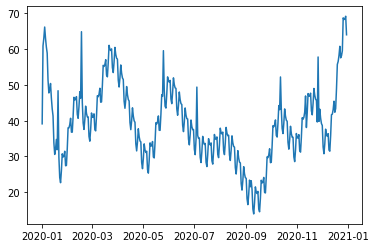

In [156]:
plt.plot(forecast_soarin["ds"], forecast_soarin["yhat"])
plt.show()

### Hollywood Studios - 3RD WK SEPT - WEDNESDAY

Rock n Roller Coaster

In [148]:
forecast_rock_n_rollercoaster.nsmallest(5, "yhat")[["ds", "yhat", "weekday"]]

ds       yhat  weekday
2084 2020-09-16  32.522652        2
2077 2020-09-09  34.424306        2
2083 2020-09-15  35.628783        1
2091 2020-09-23  36.562289        2
2085 2020-09-17  36.582847        3

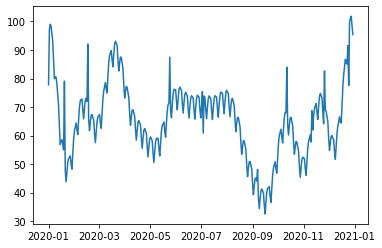

In [149]:
plt.plot(forecast_rock_n_rollercoaster["ds"], forecast_rock_n_rollercoaster["yhat"])
plt.show()

### Animal Kingdom - 2ND WK SEPT - WEDNESDAY

Expedition Everest, Kilimanjaro Safari

In [202]:
mk_adult_expedition = forecast_expedition_everest[["ds", "yhat", "weekday"]]
mk_adult_expedition

ds       yhat  weekday
1825 2020-01-01  39.538655        2
1826 2020-01-02  59.360159        3
1827 2020-01-03  61.559675        4
1828 2020-01-04  62.997340        5
1829 2020-01-05  59.745296        6
1830 2020-01-06  55.792016        0
1831 2020-01-07  51.776720        1
1832 2020-01-08  47.672335        2
1833 2020-01-09  48.861590        3
1834 2020-01-10  49.790471        4
1835 2020-01-11  50.185747        5
1836 2020-01-12  46.140477        6
1837 2020-01-13  41.658289        0
1838 2020-01-14  37.387465        1
1839 2020-01-15  33.303697        2
1840 2020-01-16  34.786160        3
1841 2020-01-17  36.271085        4
1842 2020-01-18  37.469555        5
1843 2020-01-19  34.453437        6
1844 2020-01-20  51.670819        0
1845 2020-01-21  28.327732        1
1846 2020-01-22  25.777745        2
1847 2020-01-23  28.892829        3
1848 2020-01-24  32.070869        4
1849 2020-01-25  34.983811        5
1850 2020-01-26  33.664545        6
1851 2020-01-27  32.052687        0
1852 2020-01-28  30.730240        1
1853 2020-01-29  29.605975        2
1854 2020-01-30  33.993125        3
1855 2020-01-31  38.264536        4
1856 2020-02-01  42.071971        5
1857 2020-02-02  41.433421        6
1858 2020-02-03  40.279166        0
1859 2020-02-04  39.187582        1
1860 2020-02-05  38.069520        2
1861 2020-02-06  42.245846        3
1862 2020-02-07  46.102309        4
1863 2020-02-08  49.308428        5
1864 2020-02-09  47.904265        6
1865 2020-02-10  45.845858        0
1866 2020-02-11  43.740300        1
1867 2020-02-12  41.529333        2
1868 2020-02-13  44.566068        3
1869 2020-02-14  47.268995        4
1870 2020-02-15  49.340023        5
1871 2020-02-16  46.850428        6
1872 2020-02-17  54.518847        0
1873 2020-02-18  40.778915        1
1874 2020-02-19  37.795673        2
1875 2020-02-20  40.208291        3
1876 2020-02-21  42.450379        4
1877 2020-02-22  44.234363        5
1878 2020-02-23  41.637248        6
1879 2020-02-24  38.645206        0
1880 2020-02-25  35.888001        1
1881 2020-02-26  33.322141        2
1882 2020-02-27  36.307354        3
1883 2020-02-28  39.260585        4
1884 2020-02-29  41.874220        5
1885 2020-03-01  40.202435        6
1886 2020-03-02  38.206423        0
1887 2020-03-03  36.489510        1
1888 2020-03-04  34.981016        2
1889 2020-03-05  39.013442        3
1890 2020-03-06  42.977178        4
1891 2020-03-07  46.539390        5
1892 2020-03-08  45.730989        6
1893 2020-03-09  44.492417        0
1894 2020-03-10  43.409235        1
1895 2020-03-11  42.396374        2
1896 2020-03-12  46.775617        3
1897 2020-03-13  50.930485        4
1898 2020-03-14  54.525217        5
1899 2020-03-15  53.591709        6
1900 2020-03-16  52.075174        0
1901 2020-03-17  50.569516        1
1902 2020-03-18  49.001265        2
1903 2020-03-19  52.706678        3
1904 2020-03-20  56.086173        4
1905 2020-03-21  58.822801        5
1906 2020-03-22  56.968657        6
1907 2020-03-23  54.489980        0
1908 2020-03-24  52.001958        1
1909 2020-03-25  49.452120        2
1910 2020-03-26  52.196904        3
1911 2020-03-27  54.655610        4
1912 2020-03-28  56.528437        5
1913 2020-03-29  53.882518        6
1914 2020-03-30  50.696719        0
1915 2020-03-31  47.596222        1
1916 2020-04-01  44.535765        2
1917 2020-04-02  46.876153        3
1918 2020-04-03  49.038226        4
1919 2020-04-04  50.720992        5
1920 2020-04-05  47.987829        6
1921 2020-04-06  44.811517        0
1922 2020-04-07  41.809111        1
1923 2020-04-08  38.925516        2
1924 2020-04-09  41.510367        3
1925 2020-04-10  43.972382        4
1926 2020-04-11  45.997910        5
1927 2020-04-12  43.637517        6
1928 2020-04-13  40.851414        0
1929 2020-04-14  38.244684        1
1930 2020-04-15  35.751185        2
1931 2020-04-16  38.710706        3
1932 2020-04-17  41.523560        4
1933 2020-04-18  43.869293        5
1934 2020-04-19  41.793399        6
1935 2020-04-20  

In [205]:
mk_adult_kilimanjaro = forecast_kilimanjaro_safaris[["ds", "yhat", "weekday"]]
mk_adult_kilimanjaro

ds       yhat  weekday
1825 2020-01-01  42.890432        2
1826 2020-01-02  71.555984        3
1827 2020-01-03  70.609026        4
1828 2020-01-04  71.843939        5
1829 2020-01-05  68.883189        6
1830 2020-01-06  66.564648        0
1831 2020-01-07  64.809233        1
1832 2020-01-08  58.831493        2
1833 2020-01-09  60.993644        3
1834 2020-01-10  59.234369        4
1835 2020-01-11  59.875416        5
1836 2020-01-12  56.552215        6
1837 2020-01-13  54.110357        0
1838 2020-01-14  52.473059        1
1839 2020-01-15  46.851717        2
1840 2020-01-16  49.600028        3
1841 2020-01-17  48.643021        4
1842 2020-01-18  50.284006        5
1843 2020-01-19  48.135648        6
1844 2020-01-20  68.748215        0
1845 2020-01-21  46.821727        1
1846 2020-01-22  42.729172        2
1847 2020-01-23  47.059475        3
1848 2020-01-24  47.703305        4
1849 2020-01-25  50.929657        5
1850 2020-01-26  50.317742        6
1851 2020-01-27  50.654828        0
1852 2020-01-28  51.805093        1
1853 2020-01-29  48.921580        2
1854 2020-01-30  54.301687        3
1855 2020-01-31  55.817499        4
1856 2020-02-01  59.723950        5
1857 2020-02-02  59.590975        6
1858 2020-02-03  60.201498        0
1859 2020-02-04  61.420310        1
1860 2020-02-05  58.405911        2
1861 2020-02-06  63.465792        3
1862 2020-02-07  64.486424        4
1863 2020-02-08  67.740984        5
1864 2020-02-09  66.820991        6
1865 2020-02-10  66.533688        0
1866 2020-02-11  66.770264        1
1867 2020-02-12  62.717000        2
1868 2020-02-13  66.709824        3
1869 2020-02-14  66.663585        4
1870 2020-02-15  68.879066        5
1871 2020-02-16  66.973942        6
1872 2020-02-17  85.476254        0
1873 2020-02-18  65.208496        1
1874 2020-02-19  60.465424        2
1875 2020-02-20  63.901074        3
1876 2020-02-21  63.441309        4
1877 2020-02-22  65.393929        5
1878 2020-02-23  63.379541        6
1879 2020-02-24  62.228343        0
1880 2020-02-25  61.847904        1
1881 2020-02-26  57.434051        2
1882 2020-02-27  61.325351        3
1883 2020-02-28  61.432475        4
1884 2020-02-29  64.045484        5
1885 2020-03-01  62.765222        6
1886 2020-03-02  62.400653        0
1887 2020-03-03  62.837218        1
1888 2020-03-04  59.248326        2
1889 2020-03-05  63.950404        3
1890 2020-03-06  64.832827        4
1891 2020-03-07  68.165732        5
1892 2020-03-08  67.531880        6
1893 2020-03-09  67.724405        0
1894 2020-03-10  68.615518        1
1895 2020-03-11  65.368262        2
1896 2020-03-12  70.291739        3
1897 2020-03-13  71.271147        4
1898 2020-03-14  74.575597        5
1899 2020-03-15  73.789906        6
1900 2020-03-16  73.712196        0
1901 2020-03-17  74.222377        1
1902 2020-03-18  70.493603        2
1903 2020-03-19  74.847174        3
1904 2020-03-20  75.182170        4
1905 2020-03-21  77.782859        5
1906 2020-03-22  76.250050        6
1907 2020-03-23  75.398248        0
1908 2020-03-24  75.123701        1
1909 2020-03-25  70.615434        2
1910 2020-03-26  74.209758        3
1911 2020-03-27  73.819555        4
1912 2020-03-28  75.741378        5
1913 2020-03-29  73.586558        6
1914 2020-03-30  72.178163        0
1915 2020-03-31  71.418917        1
1916 2020-04-01  66.502174        2
1917 2020-04-02  69.766421        3
1918 2020-04-03  69.124629        4
1919 2020-04-04  70.871469        5
1920 2020-04-05  68.614585        6
1921 2020-04-06  67.171771        0
1922 2020-04-07  66.439141        1
1923 2020-04-08  61.602375        2
1924 2020-04-09  64.991526        3
1925 2020-04-10  64.510669        4
1926 2020-04-11  66.445422        5
1927 2020-04-12  64.394513        6
1928 2020-04-13  63.167229        0
1929 2020-04-14  62.651829        1
1930 2020-04-15  58.027014        2
1931 2020-04-16  61.616894        3
1932 2020-04-17  61.320776        4
1933 2020-04-18  63.420769        5
1934 2020-04-19  61.513388        6
1935 2020-04-20  

In [207]:
ak_adult = mk_adult_expedition.merge(mk_adult_kilimanjaro, on='ds')
ak_adult

ds     yhat_x  weekday_x     yhat_y  weekday_y
0   2020-01-01  39.538655          2  42.890432          2
1   2020-01-02  59.360159          3  71.555984          3
2   2020-01-03  61.559675          4  70.609026          4
3   2020-01-04  62.997340          5  71.843939          5
4   2020-01-05  59.745296          6  68.883189          6
5   2020-01-06  55.792016          0  66.564648          0
6   2020-01-07  51.776720          1  64.809233          1
7   2020-01-08  47.672335          2  58.831493          2
8   2020-01-09  48.861590          3  60.993644          3
9   2020-01-10  49.790471          4  59.234369          4
10  2020-01-11  50.185747          5  59.875416          5
11  2020-01-12  46.140477          6  56.552215          6
12  2020-01-13  41.658289          0  54.110357          0
13  2020-01-14  37.387465          1  52.473059          1
14  2020-01-15  33.303697          2  46.851717          2
15  2020-01-16  34.786160          3  49.600028          3
16  2020-01-17  36.271085          4  48.643021          4
17  2020-01-18  37.469555          5  50.284006          5
18  2020-01-19  34.453437          6  48.135648          6
19  2020-01-20  51.670819          0  68.748215          0
20  2020-01-21  28.327732          1  46.821727          1
21  2020-01-22  25.777745          2  42.729172          2
22  2020-01-23  28.892829          3  47.059475          3
23  2020-01-24  32.070869          4  47.703305          4
24  2020-01-25  34.983811          5  50.929657          5
25  2020-01-26  33.664545          6  50.317742          6
26  2020-01-27  32.052687          0  50.654828          0
27  2020-01-28  30.730240          1  51.805093          1
28  2020-01-29  29.605975          2  48.921580          2
29  2020-01-30  33.993125          3  54.301687          3
30  2020-01-31  38.264536          4  55.817499          4
31  2020-02-01  42.071971          5  59.723950          5
32  2020-02-02  41.433421          6  59.590975          6
33  2020-02-03  40.279166          0  60.201498          0
34  2020-02-04  39.187582          1  61.420310          1
35  2020-02-05  38.069520          2  58.405911          2
36  2020-02-06  42.245846          3  63.465792          3
37  2020-02-07  46.102309          4  64.486424          4
38  2020-02-08  49.308428          5  67.740984          5
39  2020-02-09  47.904265          6  66.820991          6
40  2020-02-10  45.845858          0  66.533688          0
41  2020-02-11  43.740300          1  66.770264          1
42  2020-02-12  41.529333          2  62.717000          2
43  2020-02-13  44.566068          3  66.709824          3
44  2020-02-14  47.268995          4  66.663585          4
45  2020-02-15  49.340023          5  68.879066          5
46  2020-02-16  46.850428          6  66.973942          6
47  2020-02-17  54.518847          0  85.476254          0
48  2020-02-18  40.778915          1  65.208496          1
49  2020-02-19  37.795673          2  60.465424          2
50  2020-02-20  40.208291          3  63.901074          3
51  2020-02-21  42.450379          4  63.441309          4
52  2020-02-22  44.234363          5  65.393929          5
53  2020-02-23  41.637248          6  63.379541          6
54  2020-02-24  38.645206          0  62.228343          0
55  2020-02-25  35.888001          1  61.847904          1
56  2020-02-26  33.322141          2  57.434051          2
57  2020-02-27  36.307354          3  61.325351          3
58  2020-02-28  39.260585          4  61.432475          4
59  2020-02-29  41.874220          5  64.045484          5
60  2020-03-01  40.202435          6  62.765222          6
61  2020-03-02  38.206423          0  62.400653          0
62  2020-03-03  36.489510          1  62.837218          1
63  2020-03-04  34.981016          2  59.248326          2
64  2020-03-05  39.013442          3  63.950404          3
65  2020-03-06  42.977178          4  64.832827          4
66  2020-03-07  46.539390          5  68.165732          5


In [208]:
ak_adult['yhat'] = (ak_adult['yhat_x'] + ak_adult['yhat_y'])/2
ak_adult

ds     yhat_x  weekday_x     yhat_y  weekday_y       yhat
0   2020-01-01  39.538655          2  42.890432          2  41.214543
1   2020-01-02  59.360159          3  71.555984          3  65.458071
2   2020-01-03  61.559675          4  70.609026          4  66.084350
3   2020-01-04  62.997340          5  71.843939          5  67.420639
4   2020-01-05  59.745296          6  68.883189          6  64.314242
5   2020-01-06  55.792016          0  66.564648          0  61.178332
6   2020-01-07  51.776720          1  64.809233          1  58.292977
7   2020-01-08  47.672335          2  58.831493          2  53.251914
8   2020-01-09  48.861590          3  60.993644          3  54.927617
9   2020-01-10  49.790471          4  59.234369          4  54.512420
10  2020-01-11  50.185747          5  59.875416          5  55.030582
11  2020-01-12  46.140477          6  56.552215          6  51.346346
12  2020-01-13  41.658289          0  54.110357          0  47.884323
13  2020-01-14  37.387465          1  52.473059          1  44.930262
14  2020-01-15  33.303697          2  46.851717          2  40.077707
15  2020-01-16  34.786160          3  49.600028          3  42.193094
16  2020-01-17  36.271085          4  48.643021          4  42.457053
17  2020-01-18  37.469555          5  50.284006          5  43.876781
18  2020-01-19  34.453437          6  48.135648          6  41.294542
19  2020-01-20  51.670819          0  68.748215          0  60.209517
20  2020-01-21  28.327732          1  46.821727          1  37.574729
21  2020-01-22  25.777745          2  42.729172          2  34.253459
22  2020-01-23  28.892829          3  47.059475          3  37.976152
23  2020-01-24  32.070869          4  47.703305          4  39.887087
24  2020-01-25  34.983811          5  50.929657          5  42.956734
25  2020-01-26  33.664545          6  50.317742          6  41.991143
26  2020-01-27  32.052687          0  50.654828          0  41.353758
27  2020-01-28  30.730240          1  51.805093          1  41.267667
28  2020-01-29  29.605975          2  48.921580          2  39.263778
29  2020-01-30  33.993125          3  54.301687          3  44.147406
30  2020-01-31  38.264536          4  55.817499          4  47.041018
31  2020-02-01  42.071971          5  59.723950          5  50.897961
32  2020-02-02  41.433421          6  59.590975          6  50.512198
33  2020-02-03  40.279166          0  60.201498          0  50.240332
34  2020-02-04  39.187582          1  61.420310          1  50.303946
35  2020-02-05  38.069520          2  58.405911          2  48.237716
36  2020-02-06  42.245846          3  63.465792          3  52.855819
37  2020-02-07  46.102309          4  64.486424          4  55.294366
38  2020-02-08  49.308428          5  67.740984          5  58.524706
39  2020-02-09  47.904265          6  66.820991          6  57.362628
40  2020-02-10  45.845858          0  66.533688          0  56.189773
41  2020-02-11  43.740300          1  66.770264          1  55.255282
42  2020-02-12  41.529333          2  62.717000          2  52.123166
43  2020-02-13  44.566068          3  66.709824          3  55.637946
44  2020-02-14  47.268995          4  66.663585          4  56.966290
45  2020-02-15  49.340023          5  68.879066          5  59.109544
46  2020-02-16  46.850428          6  66.973942          6  56.912185
47  2020-02-17  54.518847          0  85.476254          0  69.997550
48  2020-02-18  40.778915          1  65.208496          1  52.993705
49  2020-02-19  37.795673          2  60.465424          2  49.130548
50  2020-02-20  40.208291          3  63.901074          3  52.054682
51  2020-02-21  42.450379          4  63.441309          4  52.945844
52  2020-02-22  44.234363          5  65.393929          5  54.814146
53  2020-02-23  41.637248          6  63.379541          6  52.508395
54  2020-02-24  38.645206          0  62.228343          0  50.436775
55  2020-02-25  35.888001          1  61.847904          1  48.867952
56  2020-02-26  33.322

In [209]:
ak_adult = ak_adult[['ds', 'yhat', 'weekday_x']]
ak_adult.nsmallest(5, "yhat")[["ds", "yhat", "weekday_x"]]

ds       yhat  weekday_x
252 2020-09-09  27.600318          2
259 2020-09-16  28.677077          2
245 2020-09-02  28.750299          2
251 2020-09-08  30.844215          1
253 2020-09-10  31.202792          3